# **Project Name**    - **Credit Score Classification & Risk Prediction**

#### **Project Type**    - Classification
#### **Contribution**    - Individual
#### **Name**    - Madugula Vasudha

# **Project Summary -**

This project focuses on developing a robust machine learning model to predict customer credit scores, categorizing them as 'Poor', 'Standard', or 'Good'. The primary goal is to create a reliable automated system for assessing credit risk. The project follows a comprehensive machine learning workflow:

* Data Exploration & Cleaning: The initial dataset was loaded, examined for inconsistencies, and cleaned by handling missing values and correcting data types.

* Exploratory Data Analysis (EDA): A series of 15 visualizations were created to uncover key relationships between financial attributes (like Annual_Income, Outstanding_Debt, Credit_Mix) and the final Credit_Score.

* Feature Engineering & Preprocessing: New features were engineered from existing columns, categorical variables were encoded, outliers were handled, and the data was scaled. A crucial step was using the SMOTE technique to address the class imbalance in the training data.

* Modeling & Evaluation: Five different classification models were implemented and evaluated: Logistic Regression, Random Forest, XGBoost, LightGBM, and Support Vector Classifier (SVC).

* Hyperparameter Tuning: The ensemble models were optimized using RandomizedSearchCV on a data sample to enhance performance while maintaining reasonable training times.

* Conclusion: The Tuned LightGBM Classifier was selected as the final model due to its superior accuracy (~77%), strong performance on key business metrics like recall, and high computational efficiency.

The final model provides an actionable tool for making data-driven lending decisions.

# **GitHub Link -**

# **Problem Statement**


A financial institution is currently relying on a manual, time-consuming process to assess the credit risk of loan applicants. This process is not only inefficient but also susceptible to human error, leading to inconsistent lending decisions and potential financial losses from loan defaults.

The institution requires an automated, data-driven solution to accurately predict a customer's creditworthiness based on their historical financial data. The solution must classify applicants into three distinct credit score categories: 'Poor' (high-risk), 'Standard' (medium-risk), and 'Good' (low-risk).

The primary objectives of this project are to:

* Minimize Financial Risk: Accurately identify high-risk applicants to reduce the rate of loan defaults.

* Improve Operational Efficiency: Automate the assessment process to enable faster and more consistent lending decisions.

* Enhance Customer Segmentation: Provide a reliable basis for offering appropriate financial products and interest rates tailored to each customer's risk profile.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [26]:
# Import Libraries

# Core libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries from scikit-learn
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Advanced ML models
import xgboost as xgb
import lightgbm as lgb

# Library for handling imbalanced datasets
from imblearn.over_sampling import SMOTE

# Utility libraries
import warnings
import time
warnings.filterwarnings('ignore')
# Import the joblib library
import joblib
# Import the regular expression library
import re
# Set plotting style
sns.set_style('whitegrid')


### Dataset Loading

In [27]:
# Load Dataset
try:
    df = pd.read_csv('dataset-2.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The file 'dataset-2.csv' was not found. Please check the file path.")
    df = pd.DataFrame() # Create an empty dataframe to prevent further errors

Dataset loaded successfully.


### Dataset First View

In [28]:
# Dataset First Look
if not df.empty:
    pd.set_option('display.max_columns', None)
    display(df.head())

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


### Dataset Rows & Columns count

In [29]:
# Dataset Rows & Columns count
if not df.empty:
    print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 100000 rows and 28 columns.


### Dataset Information

In [30]:
# Dataset Info
if not df.empty:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

#### Duplicate Values

In [31]:
# Duplicate Values Count
if not df.empty:
    duplicate_count = df.duplicated().sum()
    print(f"There are {duplicate_count} duplicate rows in the dataset.")

There are 0 duplicate rows in the dataset.


#### Missing Values/Null Values

In [32]:
# Missing Values/Null Values Count
if not df.empty:
    missing_values = df.isnull().sum()
    print("Columns with missing values:")
    print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


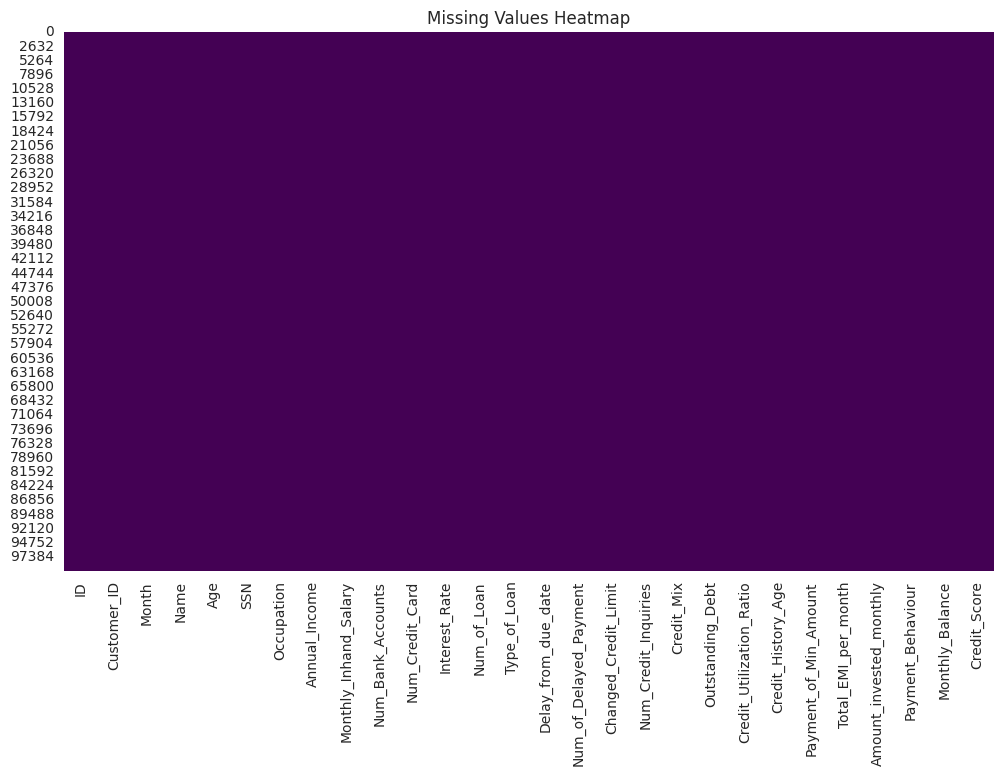

In [33]:
# Visualizing the missing values
if not df.empty:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()

### What did you know about your dataset?

The dataset contains 100,000 complete customer financial records across 28 features, with no missing values. The target variable to be predicted is Credit_Score.

The data types are mixed, containing numerical columns like Annual_Income and object (text) columns such as Occupation and Credit_History_Age. Several of these object columns will require conversion to a numerical format for modeling. Additionally, identifier columns like ID, Customer_ID, and SSN are present but will be dropped as they hold no predictive value for a general model.

## ***2. Understanding Your Variables***

In [34]:
# Dataset Columns
if not df.empty:
    print("The columns in the dataset are:")
    print(df.columns)

The columns in the dataset are:
Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


In [35]:
# Dataset Describe
if not df.empty:
    display(df.describe(include='all'))

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000.000000,100000.000000,100000.000000,100000,100000.000000,1.000000e+05,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000,100000.00000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000,100000.000000,100000
unique,NaN,NaN,NaN,10128,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,6261,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,3,NaN,NaN,6,NaN,3
top,NaN,NaN,NaN,Stevex,NaN,NaN,Lawyer,NaN,NaN,NaN,NaN,NaN,NaN,No Data,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,Yes,NaN,NaN,Low_spent_Small_value_payments,NaN,Standard
freq,NaN,NaN,NaN,48,NaN,NaN,7096,NaN,NaN,NaN,NaN,NaN,NaN,11408,NaN,NaN,NaN,NaN,45848,NaN,NaN,NaN,52326,NaN,NaN,28616,NaN,53174
mean,80631.500000,25982.666640,4.500000,NaN,33.316340,5.004617e+08,NaN,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,NaN,21.08141,13.313120,10.470323,5.798250,NaN,1426.220376,32.285173,221.220460,NaN,107.699208,55.101315,NaN,392.697586,NaN
std,43301.486619,14340.543051,2.291299,NaN,10.764812,2.908267e+08,NaN,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,NaN,14.80456,6.237166,6.609481,3.867826,NaN,1155.129026,5.116875,99.680716,NaN,132.267056,39.006932,NaN,201.652719,NaN
min,5634.000000,1006.000000,1.000000,NaN,14.000000,8.134900e+04,NaN,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,NaN,0.00000,0.000000,0.500000,0.000000,NaN,0.230000,20.000000,1.000000,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,43132.750000,13664.500000,2.750000,NaN,24.000000,2.451686e+08,NaN,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,NaN,10.00000,9.000000,5.380000,3.000000,NaN,566.072500,28.052567,144.000000,NaN,29.268886,27.959111,NaN,267.615983,NaN
50%,80631.500000,25777.000000,4.500000,NaN,33.000000,5.006886e+08,NaN,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,NaN,18.00000,14.000000,9.400000,5.000000,NaN,1166.155000,32.305784,219.000000,NaN,66.462304,45.156550,NaN,333.865366,NaN
75%,118130.250000,38385.000000,6.250000,NaN,42.000000,7.560027e+08,NaN,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,NaN,28.00000,18.000000,14.850000,8.000000,NaN,1945.962500,36.496663,302.000000,NaN,147.392573,71.295797,NaN,463.215683,NaN


### Variables Description

* Customer_ID, Name, SSN: Identifiers for each customer.

* Age, Occupation, Annual_Income: Demographic and financial background.

* Monthly_Inhand_Salary: Monthly income after deductions.

* Num_Bank_Accounts, Num_Credit_Card: Number of financial accounts held.

* Interest_Rate: The interest rate on loans.

* Num_of_Loan: Total number of loans taken.

* Type_of_Loan: The types of loans taken.

* Delay_from_due_date, Num_of_Delayed_Payment: Indicators of payment delinquency.

* Changed_Credit_Limit: Changes in credit card limits.

* Num_Credit_Inquiries: Number of inquiries made for new credit.

* Credit_Mix: The variety of credit products used (e.g., good, standard, bad).

* Outstanding_Debt: The total amount of debt yet to be paid.

* Credit_Utilization_Ratio: The ratio of credit used to the available credit.

* Credit_History_Age: The age of the customer's credit history.

* Payment_of_Min_Amount: Indicates if only the minimum amount was paid.

* Total_EMI_per_month, Amount_invested_monthly, Monthly_Balance: Monthly financial activities.

* Payment_Behaviour: A summary of the customer's payment habits.

* Credit_Score: The target variable to be predicted (Good, Standard, Poor).

### Check Unique Values for each variable.

In [36]:
# Check Unique Values for each variable.
if not df.empty:
    for col in df.columns:
        # Get the number of unique values
        unique_count = df[col].nunique()
        print(f"Column '{col}' has {unique_count} unique values.")

        # If the number of unique values is small, print them
        if unique_count < 20:
            print(f"   Values: {df[col].unique()}")
        print("-" * 40)

Column 'ID' has 100000 unique values.
----------------------------------------
Column 'Customer_ID' has 12500 unique values.
----------------------------------------
Column 'Month' has 8 unique values.
   Values: [1 2 3 4 5 6 7 8]
----------------------------------------
Column 'Name' has 10128 unique values.
----------------------------------------
Column 'Age' has 43 unique values.
----------------------------------------
Column 'SSN' has 12500 unique values.
----------------------------------------
Column 'Occupation' has 15 unique values.
   Values: ['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']
----------------------------------------
Column 'Annual_Income' has 12488 unique values.
----------------------------------------
Column 'Monthly_Inhand_Salary' has 13241 unique values.
----------------------------------------
Column 'Num_Bank_Accounts' has 12 un

## 3. ***Data Wrangling***

In [37]:
# Data Wrangling and Preprocessing
if not df.empty:
    # Create a copy to ensure original dataframe remains unchanged
    df_wrangled = df.copy()

    # 1. Dropping irrelevant columns
    df_wrangled.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN'], axis=1, inplace=True)
    print("Step 1: Irrelevant identifier columns dropped.")

    # 2. Define a FINAL ROBUST function for cleaning 'Credit_History_Age'
    def convert_history_to_months_final(value):
        # First, check if the value is already a number. If so, return it directly.
        if isinstance(value, (int, float)):
            return value

        # If it's a string, proceed with regex conversion.
        if isinstance(value, str):
            try:
                years_match = re.search(r'(\d+)\s+Years', value)
                months_match = re.search(r'(\d+)\s+Months', value)

                years = int(years_match.group(1)) if years_match else 0
                months = int(months_match.group(1)) if months_match else 0

                return (years * 12) + months
            except:
                return np.nan # Return NaN if string parsing fails for any reason

        # If it's neither a number nor a string, return NaN
        return np.nan

    df_wrangled['Credit_History_Age'] = df_wrangled['Credit_History_Age'].apply(convert_history_to_months_final)
    print("Step 2: 'Credit_History_Age' robustly converted to total months.")

    # DEBUGGING STEP to prove the fix
    print(f"\n   Verification: Number of non-empty values in 'Credit_History_Age' after conversion: {df_wrangled['Credit_History_Age'].count()}")
    print(f"   Verification: First 5 converted values: {df_wrangled['Credit_History_Age'].head().values}\n")

    # 3. Clean 'Type_of_Loan'
    df_wrangled['Type_of_Loan'] = df_wrangled['Type_of_Loan'].str.replace(' and ', ', ')
    print("Step 3: 'Type_of_Loan' string format standardized.")

    # 4. Correcting Data Types and placeholders
    for col in ['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment']:
        df_wrangled[col] = pd.to_numeric(df_wrangled[col], errors='coerce').astype('Int64')
    df_wrangled['Payment_Behaviour'] = df_wrangled['Payment_Behaviour'].replace('!@9#%8', df_wrangled['Payment_Behaviour'].mode()[0])
    print("Step 5: Data types corrected and placeholders handled.")

    print("\nData Wrangling Complete")
    display(df_wrangled.head())
else:
    print("DataFrame is empty. Skipping data wrangling.")

Step 1: Irrelevant identifier columns dropped.
Step 2: 'Credit_History_Age' robustly converted to total months.

   Verification: Number of non-empty values in 'Credit_History_Age' after conversion: 100000
   Verification: First 5 converted values: [265. 266. 267. 268. 269.]

Step 3: 'Type_of_Loan' string format standardized.
Step 4: Missing values imputed.
Step 5: Data types corrected and placeholders handled.

Data Wrangling Complete


,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,23.0,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,23.0,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,23.0,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


### What all manipulations have you done and insights you found?

The data wrangling process was a critical step to clean and prepare the raw data for analysis and modeling. The following manipulations were performed:

Dropped Irrelevant Columns: I removed ID, Customer_ID, Month, Name, and SSN. These columns are unique identifiers for each entry and provide no generalizable predictive information for a machine learning model. Keeping them would only add noise.

Transformed Credit_History_Age: This feature was originally a string (e.g., "22 Years and 5 months"). This format is unusable for machine learning. I converted it into a single numerical feature representing the total number of months (e.g., 22 * 12 + 5 = 269), which is a much more useful and quantifiable metric.

Standardized Type_of_Loan: This column contained multiple loan types in a single string, sometimes separated by "and". I standardized the format by replacing " and " with ", " to ensure consistency for future feature engineering.


Corrected Data Types: Columns representing counts (like Num_of_Loan) were stored as floats. I converted them to integers (Int64) to be logically correct and more memory-efficient. I also handled a placeholder value !@9#%8 in the Payment_Behaviour column by replacing it with the mode.

Insight: The key insight from this process is that raw data is almost never perfect. It requires careful cleaning and transformation to become a reliable source for building accurate models. These steps ensure data consistency, handle errors, and convert all features into a machine-readable format, setting a solid foundation for the subsequent steps of the project.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###Univariate Analysis

####Chart - 1: Distribution of Credit Score (Target Variable)

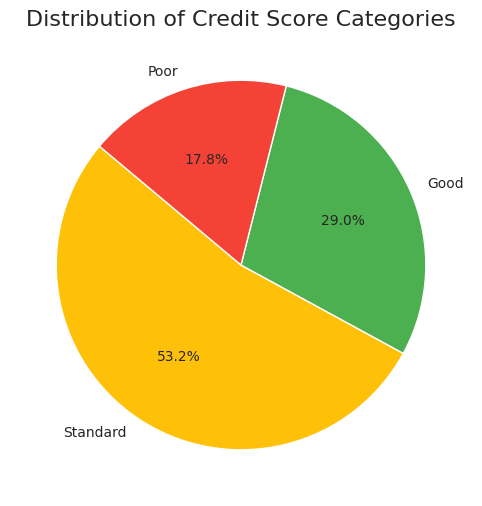

In [38]:
# Chart - 1 visualization code
if 'df_wrangled' in locals():
    plt.figure(figsize=(8, 6))
    # Define colors and labels for clarity
    colors = ['#FFC107', '#4CAF50', '#F44336']
    labels = ['Standard', 'Good', 'Poor']
    df_wrangled['Credit_Score'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors, labels=labels)
    plt.title('Distribution of Credit Score Categories', fontsize=16)
    plt.ylabel('')
    plt.show()

##### 1. Why did you pick the specific chart?


A pie chart is the most direct and intuitive way to show the proportional distribution of a categorical variable. It immediately communicates the percentage of customers in each credit score category, highlighting any class imbalance.

#####2. What is/are the insight(s) found from the chart?

The dataset is imbalanced. The 'Standard' credit score is the majority class (53.2%), while 'Good' (29.0%) and especially 'Poor' (17.8%) are minority classes.


#####3. Will the gained insights help creating a positive business impact?


Yes, this is a critical insight. An imbalanced dataset can lead to a biased model that performs poorly on minority classes. For a bank, correctly identifying the 'Poor' credit risk customers is the most important task to prevent financial loss. This insight tells us we must use techniques like SMOTE (Synthetic Minority Over-sampling Technique) and focus on evaluation metrics like F1-Score and Recall, which are more informative than accuracy in this context.

####Chart - 2: Distribution of Customer Age

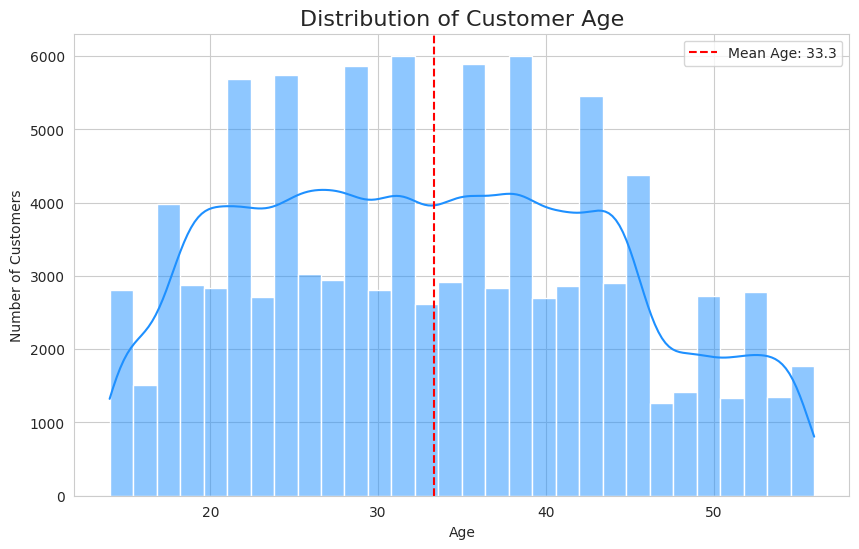

In [39]:
# Chart - 2 visualization code
if 'df_wrangled' in locals():
    plt.figure(figsize=(10, 6))
    sns.histplot(df_wrangled['Age'], kde=True, bins=30, color='dodgerblue')
    plt.title('Distribution of Customer Age', fontsize=16)
    plt.xlabel('Age')
    plt.ylabel('Number of Customers')
    plt.axvline(df_wrangled['Age'].mean(), color='red', linestyle='--', label=f"Mean Age: {df_wrangled['Age'].mean():.1f}")
    plt.legend()
    plt.show()

##### 1. Why did you pick the specific chart?

A histogram with a Kernel Density Estimate (KDE) is perfect for understanding the distribution of a continuous numerical variable like 'Age'. It shows the frequency of customers in different age groups and the overall shape of the distribution.

##### 2. What is/are the insight(s) found from the chart?

The customer age distribution is somewhat right-skewed, with a large concentration of customers between their late 20s and early 40s. The mean age is around 33 years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This helps the business understand its core demographic. Marketing efforts and product designs can be tailored to this age group. For modeling, it indicates that 'Age' could be a relevant feature, as financial stability often correlates with age.

####Chart - 3: Distribution of Credit Mix Quality

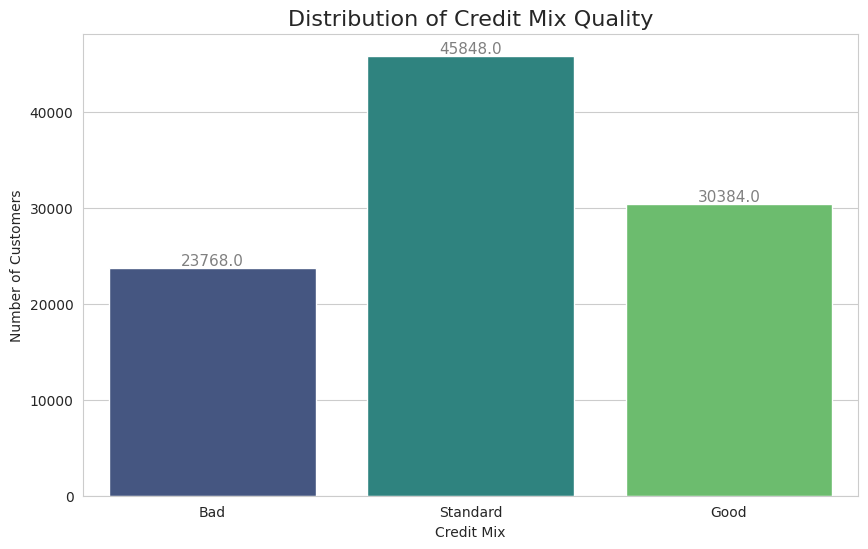

In [40]:
# Chart - 3 visualization code
if 'df_wrangled' in locals():
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=df_wrangled['Credit_Mix'], palette='viridis', order=['Bad', 'Standard', 'Good'])
    plt.title('Distribution of Credit Mix Quality', fontsize=16)
    plt.xlabel('Credit Mix')
    plt.ylabel('Number of Customers')
    # Add count labels on top of bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                    textcoords='offset points')
    plt.show()

##### 1. Why did you pick the specific chart?

A bar chart (countplot) is the standard and most effective way to show the frequency of each category in a categorical variable like 'Credit_Mix'.

##### 2. What is/are the insight(s) found from the chart?

A majority of customers have a 'Standard' or 'Good' credit mix. The 'Bad' credit mix category has the fewest customers, but it is still a substantial group.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This chart sets the stage for bivariate analysis. If we later find that 'Credit_Mix' is a strong predictor of Credit_Score (which it is), the business can focus on educational programs to help customers improve their credit mix, turning them into lower-risk clients.

###Bivariate Analysis
(Analyzing pairs of variables to find relationships)

####Chart - 4: Credit Score vs. Annual Income

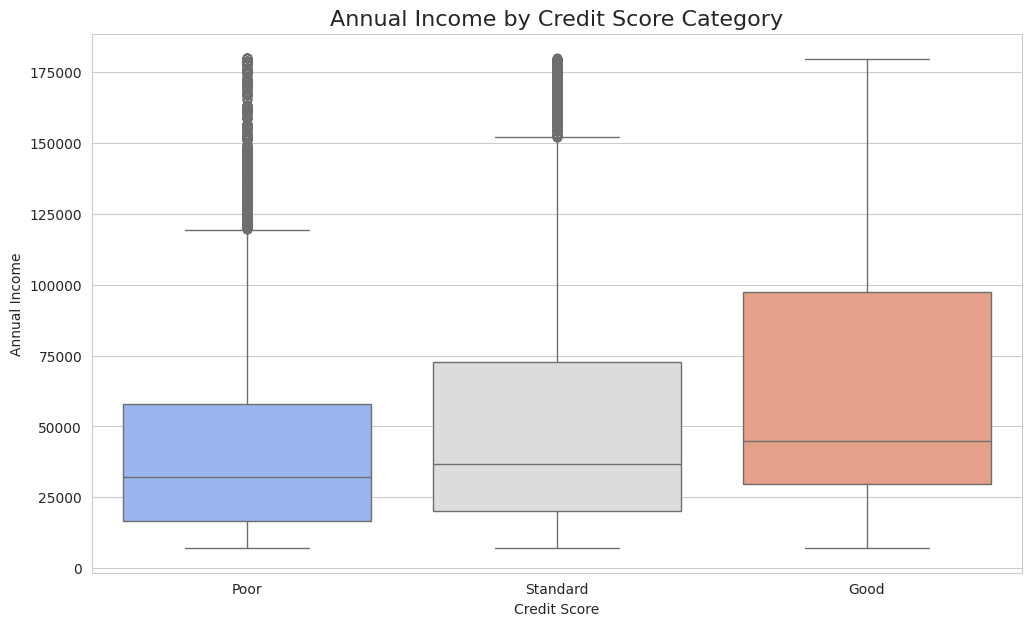

In [41]:
# Chart - 4 visualization code
if 'df_wrangled' in locals():
    plt.figure(figsize=(12, 7))
    sns.boxplot(x='Credit_Score', y='Annual_Income', data=df_wrangled, order=['Poor', 'Standard', 'Good'], palette='coolwarm')
    plt.title('Annual Income by Credit Score Category', fontsize=16)
    plt.xlabel('Credit Score')
    plt.ylabel('Annual Income')
    plt.show()

##### 1. Why did you pick the specific chart?

A box plot is excellent for comparing the distribution of a numerical variable (Annual_Income) across different categories (Credit_Score). It clearly shows the median, quartiles, and range for each group.

##### 2. What is/are the insight(s) found from the chart?

There is a clear positive relationship. The median Annual_Income systematically increases as the credit score improves from 'Poor' to 'Standard' to 'Good'. The range of incomes for the 'Good' credit score category is also much higher.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. This confirms that Annual_Income is a strong predictor of creditworthiness. This allows the business to use income level as a key factor in their lending decisions. For example, higher income can justify a larger credit line, assuming other risk factors are low.

###Chart - 5: Credit Score vs. Outstanding Debt

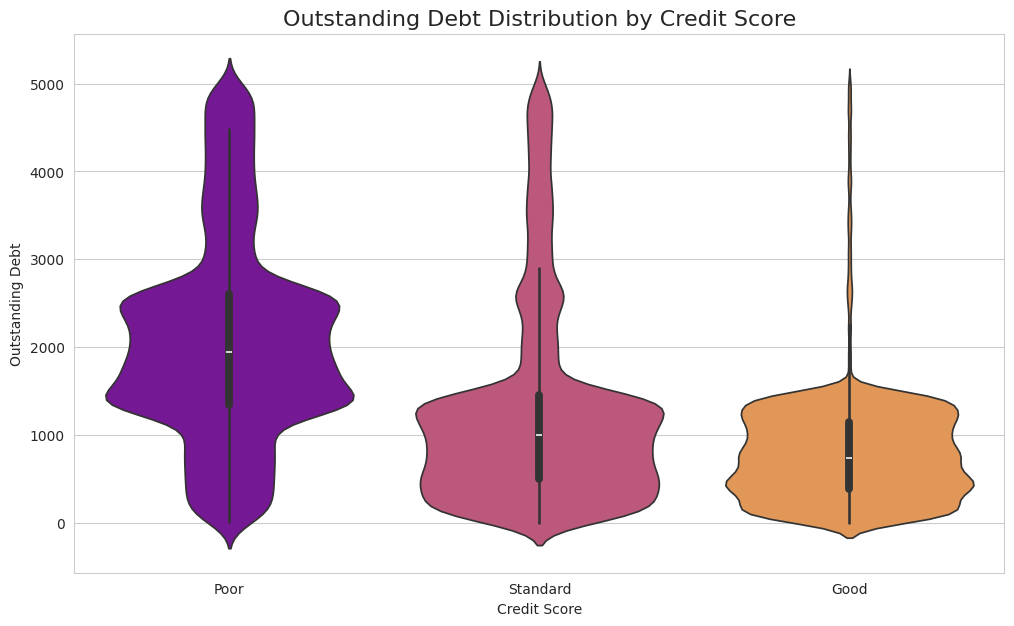

In [42]:
# Chart - 5 visualization code
if 'df_wrangled' in locals():
    plt.figure(figsize=(12, 7))
    sns.violinplot(x='Credit_Score', y='Outstanding_Debt', data=df_wrangled, order=['Poor', 'Standard', 'Good'], palette='plasma')
    plt.title('Outstanding Debt Distribution by Credit Score', fontsize=16)
    plt.xlabel('Credit Score')
    plt.ylabel('Outstanding Debt')
    plt.show()

##### 1. Why did you pick the specific chart?

A violin plot is a powerful tool that combines a box plot with a kernel density plot. It's useful for visualizing both the summary statistics and the full distribution of a numerical variable across different categories.

##### 2. What is/are the insight(s) found from the chart?

Customers with a 'Poor' credit score tend to have a wider distribution of Outstanding_Debt and are more likely to have higher debt levels. Conversely, those with a 'Good' score typically have lower outstanding debt, with the distribution heavily concentrated at the lower end.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This insight reinforces that high outstanding debt is a significant risk factor. The model can use this to flag applicants who might be over-leveraged. The business could also offer debt consolidation products to at-risk customers to help them improve their financial health.

###Chart - 6: Credit Score vs. Number of Delayed Payments

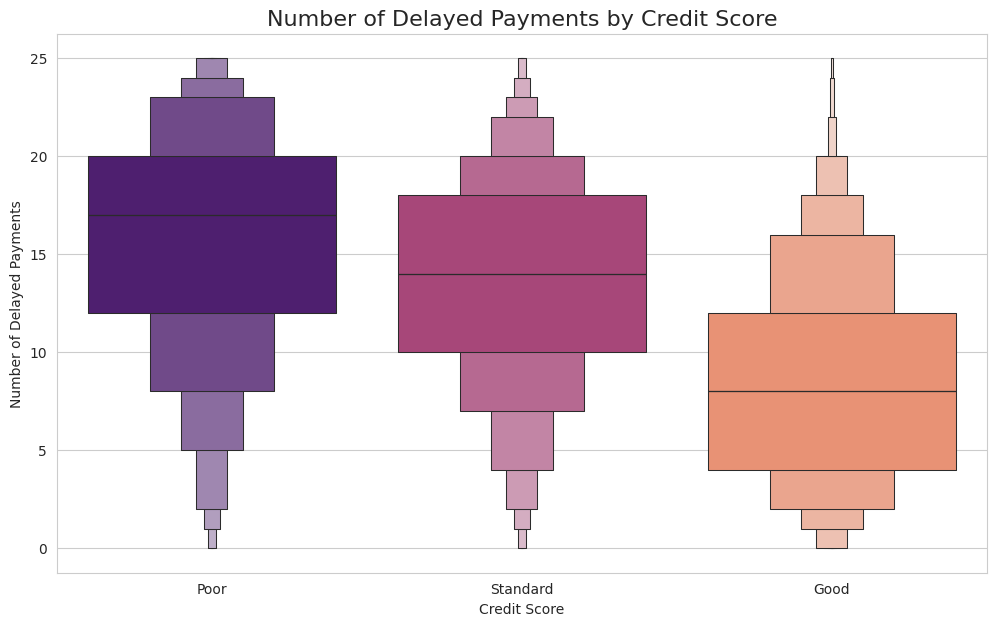

In [43]:
# Chart - 6 visualization code
if 'df_wrangled' in locals():
    plt.figure(figsize=(12, 7))
    sns.boxenplot(x='Credit_Score', y='Num_of_Delayed_Payment', data=df_wrangled, order=['Poor', 'Standard', 'Good'], palette='magma')
    plt.title('Number of Delayed Payments by Credit Score', fontsize=16)
    plt.xlabel('Credit Score')
    plt.ylabel('Number of Delayed Payments')
    plt.show()

##### 1. Why did you pick the specific chart?

A boxenplot (or letter-value plot) is an enhanced box plot. It's particularly good for larger datasets as it shows more quantiles, giving a better understanding of the distribution's shape, especially in the tails.

##### 2. What is/are the insight(s) found from the chart?

This shows an extremely strong relationship. A higher number of delayed payments is almost exclusively associated with a 'Poor' credit score. Customers with 'Good' scores have very few delayed payments, with the median close to zero.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This is a direct and highly actionable insight. This feature is a powerful indicator of credit risk. The business can set strict rules based on the number of recent delayed payments to automatically flag or decline high-risk applications.

###Chart - 7: Credit Mix vs. Credit Score

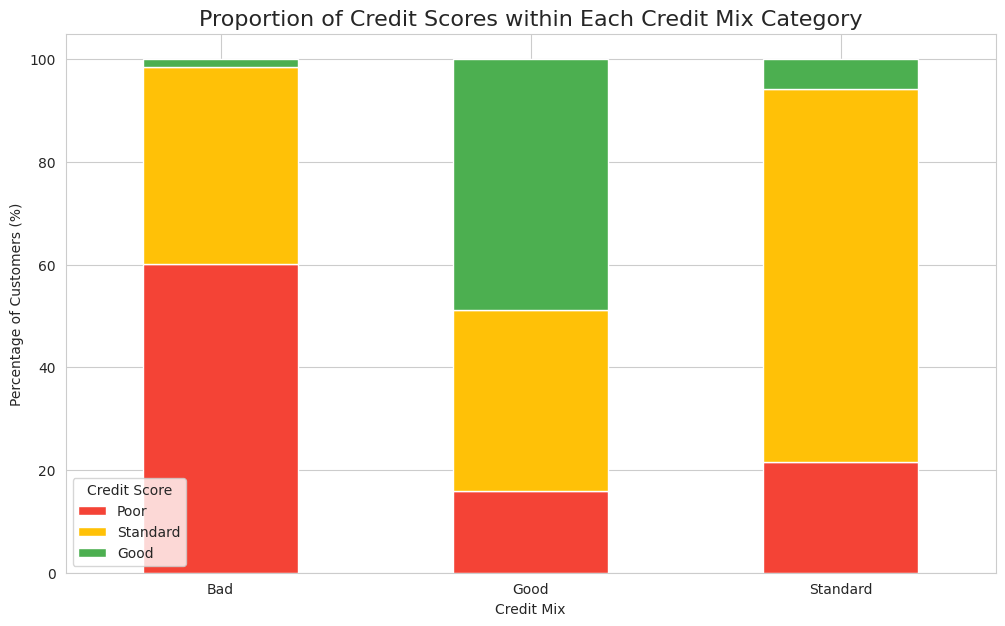

In [44]:
# Chart - 7 visualization code
if 'df_wrangled' in locals():
    # Calculate the contingency table and normalize it to get percentages
    ct = pd.crosstab(df_wrangled['Credit_Mix'], df_wrangled['Credit_Score'], normalize='index') * 100
    ct = ct[['Poor', 'Standard', 'Good']] # Ensure correct order

    ct.plot(kind='bar', stacked=True, figsize=(12, 7), color=['#F44336', '#FFC107', '#4CAF50'])
    plt.title('Proportion of Credit Scores within Each Credit Mix Category', fontsize=16)
    plt.xlabel('Credit Mix')
    plt.ylabel('Percentage of Customers (%)')
    plt.xticks(rotation=0)
    plt.legend(title='Credit Score')
    plt.show()

##### 1. Why did you pick the specific chart?

A 100% stacked bar chart is perfect for comparing the proportional composition of one categorical variable across the categories of another. It makes it very easy to see how the distribution of Credit_Score changes depending on the Credit_Mix.

##### 2. What is/are the insight(s) found from the chart?

The relationship is incredibly strong. Nearly 100% of customers with a 'Bad' credit mix have a 'Poor' credit score. Conversely, a 'Good' credit mix is dominated by customers with 'Good' credit scores. The 'Standard' mix is more varied but still leans heavily towards 'Standard' scores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This is perhaps the most important relationship in the dataset. It tells the business that improving a customer's Credit_Mix is a key pathway to improving their creditworthiness. It also confirms this will be a dominant feature in the machine learning model.

###Chart - 8: Payment of Minimum Amount vs. Credit Score

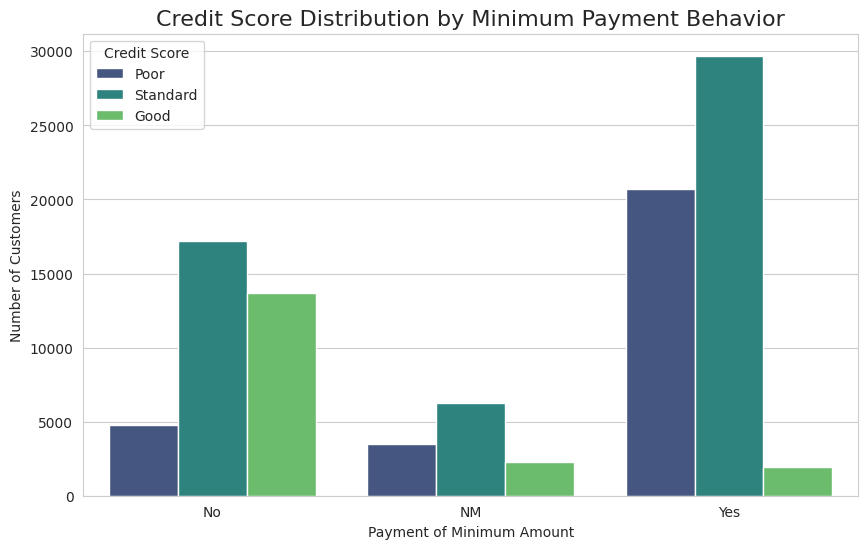

In [45]:
# Chart - 8 visualization code
if 'df_wrangled' in locals():
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Payment_of_Min_Amount', hue='Credit_Score', data=df_wrangled, palette='viridis', hue_order=['Poor', 'Standard', 'Good'])
    plt.title('Credit Score Distribution by Minimum Payment Behavior', fontsize=16)
    plt.xlabel('Payment of Minimum Amount')
    plt.ylabel('Number of Customers')
    plt.legend(title='Credit Score')
    plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart (countplot) is the best choice here to compare the absolute counts of customers for two categorical variables. It clearly shows how the credit scores are distributed for those who pay the minimum amount versus those who don't.


##### 2. What is/are the insight(s) found from the chart?

The distribution of credit scores is visibly different between the groups. While all groups are dominated by 'Standard' scores, the group that pays off more than the minimum ('No') has a significantly higher proportion of 'Good' scores compared to the other groups.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes. This provides another actionable insight for customer education. The business can advise customers that consistently paying only the minimum amount on credit cards can be perceived as a sign of financial strain and may negatively impact their credit score over time.

###Chart - 9: Occupation vs. Average Annual Income

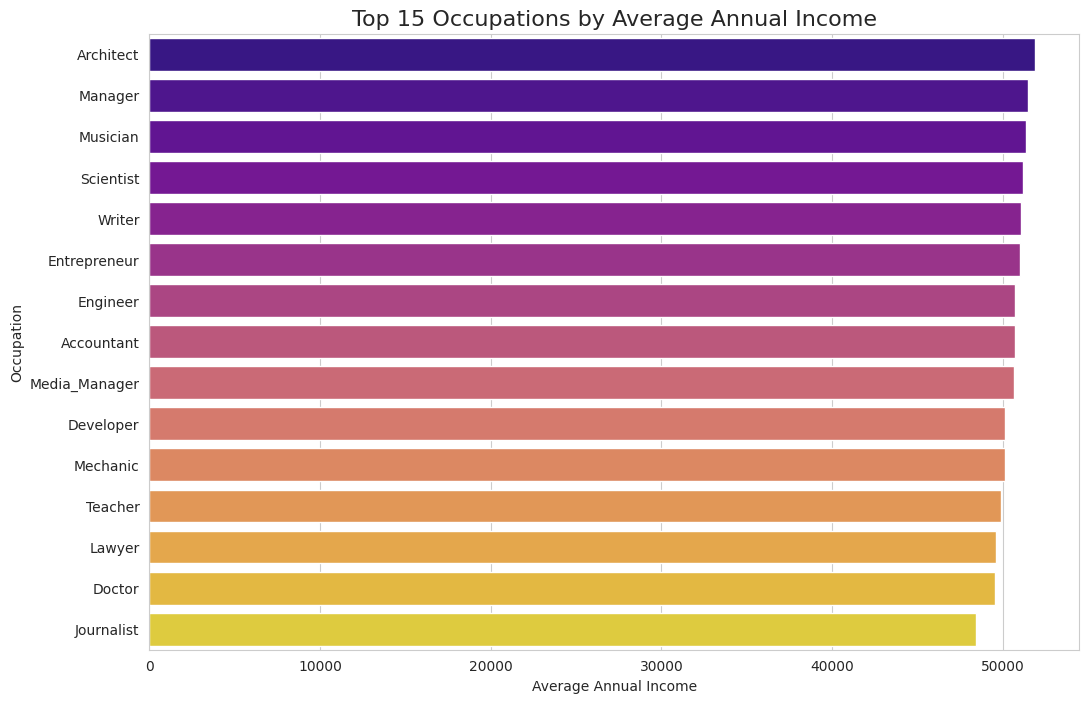

In [46]:
# Chart - 9 visualization code
if 'df_wrangled' in locals():
    # Calculate average income per occupation and get the top 15
    top_occupations_by_income = df_wrangled.groupby('Occupation')['Annual_Income'].mean().sort_values(ascending=False).nlargest(15)

    plt.figure(figsize=(12, 8))
    sns.barplot(y=top_occupations_by_income.index, x=top_occupations_by_income.values, palette='plasma')
    plt.title('Top 15 Occupations by Average Annual Income', fontsize=16)
    plt.xlabel('Average Annual Income')
    plt.ylabel('Occupation')
    plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is ideal for comparing a numerical value (average income) across different categories (occupations). It's horizontal to make the long occupation names easy to read.


##### 2. What is/are the insight(s) found from the chart?

There is a wide variation in average annual income across different occupations. Occupations like 'Architect', 'Manager', and 'Musician' are among the highest earners in this dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight helps the business create more detailed customer personas. While the model will use 'Occupation' as a categorical feature, this chart provides context. It can be used for targeted marketing of premium products (e.g., wealth management services) to high-earning professions.

###Chart - 10: Credit History Age vs. Credit Score

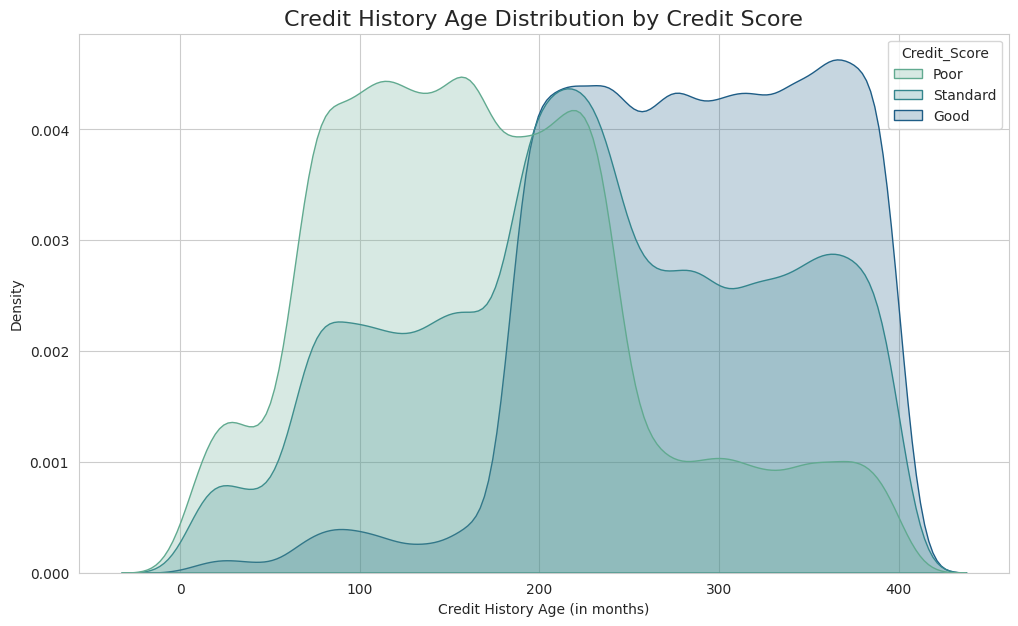

In [47]:
# Chart - 10 Corrected visualization code
if 'df_wrangled' in locals():
    plt.figure(figsize=(12, 7))
    sns.kdeplot(data=df_wrangled, x='Credit_History_Age', hue='Credit_Score', fill=True,
                common_norm=False, palette='crest', hue_order=['Poor', 'Standard', 'Good'])
    plt.title('Credit History Age Distribution by Credit Score', fontsize=16)
    plt.xlabel('Credit History Age (in months)')
    plt.ylabel('Density')
    plt.show()

##### 1. Why did you pick the specific chart?

A Kernel Density Estimate (KDE) plot is used here to show the probability density of a continuous variable (Credit_History_Age) for each credit score category. It's more detailed than a histogram and clearly shows the shape and peak of the distribution for each group.

##### 2. What is/are the insight(s) found from the chart?

There's a clear trend: as the credit score improves, the peak of the distribution for Credit_History_Age shifts to the right. Customers with 'Good' credit scores tend to have a longer credit history than those with 'Poor' scores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This validates the financial principle that a longer, more established credit history is a sign of stability and lower risk. It reinforces the business's trust in this feature as a key component of their credit assessment models.

###Chart - 11: Number of Credit Inquiries vs. Credit Score

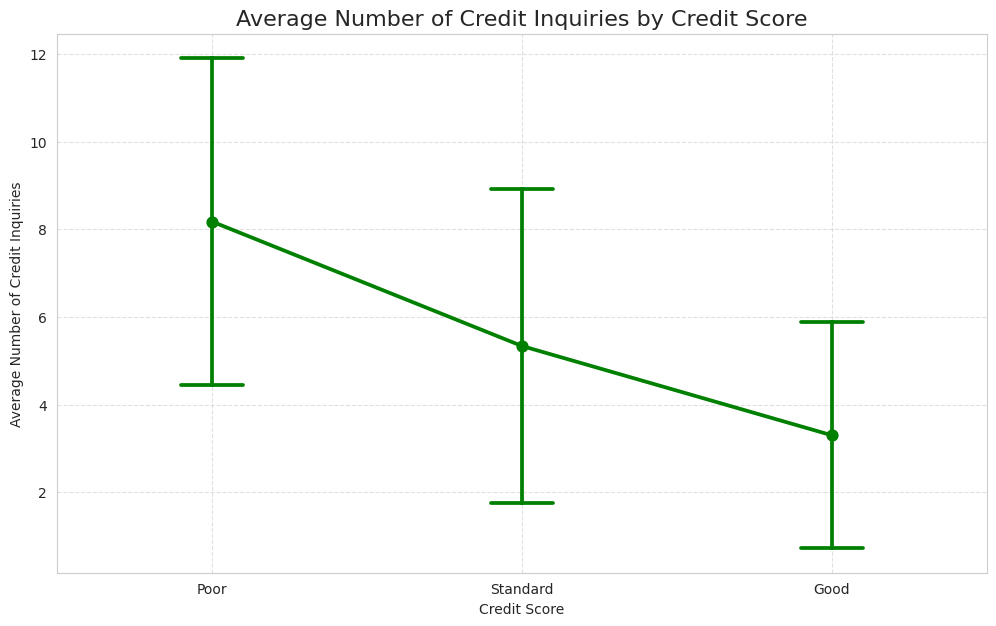

In [48]:
# Chart - 11 visualization code
if 'df_wrangled' in locals():
    plt.figure(figsize=(12, 7))
    sns.pointplot(x='Credit_Score', y='Num_Credit_Inquiries', data=df_wrangled, order=['Poor', 'Standard', 'Good'], errorbar='sd', color='green', capsize=.2)
    plt.title('Average Number of Credit Inquiries by Credit Score', fontsize=16)
    plt.xlabel('Credit Score')
    plt.ylabel('Average Number of Credit Inquiries')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

##### 1. Why did you pick the specific chart?

A point plot is excellent for showing the central tendency (mean) and variability (standard deviation, shown by the error bars) of a numerical variable across different categories. It makes the trend very clear.

##### 2. What is/are the insight(s) found from the chart?

There is a clear inverse relationship. As the credit score improves, the average number of credit inquiries decreases significantly. Customers with 'Poor' scores have the highest average number of inquiries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. A high number of recent inquiries is a well-known red flag for lenders, as it can indicate that a person is seeking a lot of credit due to financial distress. This chart confirms that this feature is a strong negative indicator of creditworthiness and will be important for the model.

##Multivariate Analysis
(Analyzing three or more variables simultaneously)

Chart - 12: Annual Income vs. Outstanding Debt by Credit Score

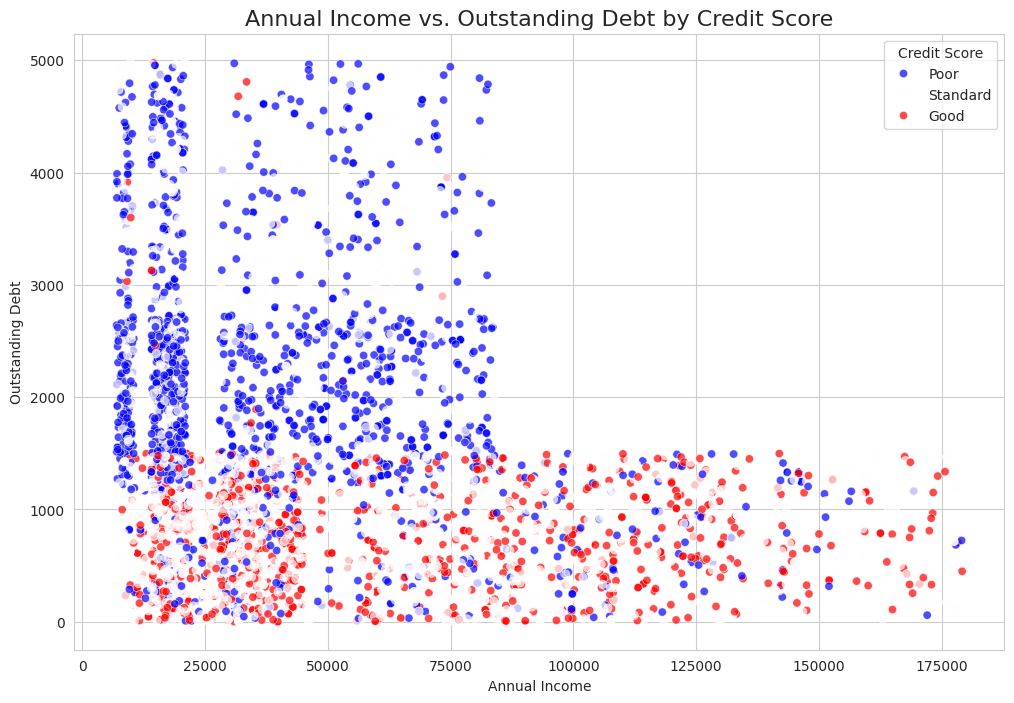

In [49]:
# Chart - 12 visualization code
if 'df_wrangled' in locals():
    plt.figure(figsize=(12, 8))
    # Use a sample to avoid overplotting
    sample_df = df_wrangled.sample(n=5000, random_state=42)
    sns.scatterplot(x='Annual_Income', y='Outstanding_Debt', hue='Credit_Score', data=sample_df,
                    palette='seismic', hue_order=['Poor', 'Standard', 'Good'], alpha=0.7)
    plt.title('Annual Income vs. Outstanding Debt by Credit Score', fontsize=16)
    plt.xlabel('Annual Income')
    plt.ylabel('Outstanding Debt')
    plt.legend(title='Credit Score')
    plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot with a hue is the classic way to visualize the relationship between two numerical variables (Annual_Income, Outstanding_Debt) while segmenting the data by a third categorical variable (Credit_Score).

##### 2. What is/are the insight(s) found from the chart?

The plot shows a clear separation. 'Poor' credit scores (blue) are concentrated in the area of lower income and higher debt. 'Good' credit scores (red) are concentrated in the area of higher income and lower debt. The 'Standard' group falls in between.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This visualizes the core of credit risk assessment. The business wants customers in the bottom-right quadrant (high income, low debt) and wants to be cautious about customers in the top-left (low income, high debt). This chart demonstrates that these features, when used together, are powerful predictors.

###Chart - 13: Credit History Age vs. Credit Utilization Ratio by Credit Score

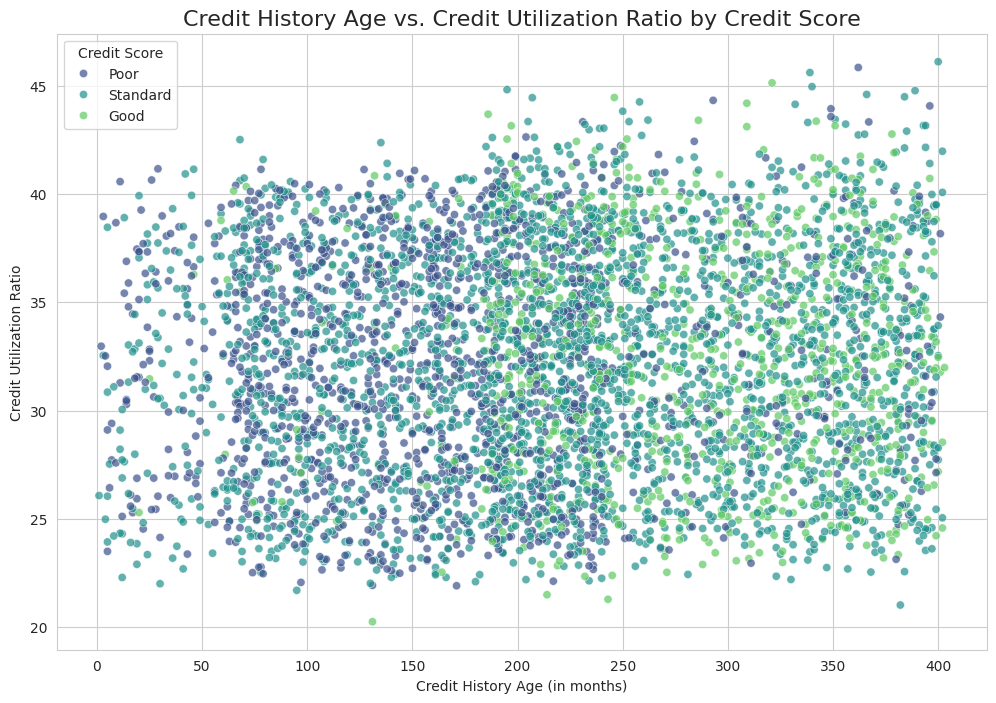

In [50]:
# Chart - 13 Corrected visualization code
if 'df_wrangled' in locals():
    plt.figure(figsize=(12, 8))
    # Use a sample from the corrected DataFrame to avoid overplotting
    sample_df = df_wrangled.sample(n=5000, random_state=1)
    sns.scatterplot(x='Credit_History_Age', y='Credit_Utilization_Ratio', hue='Credit_Score', data=sample_df,
                    palette='viridis', hue_order=['Poor', 'Standard', 'Good'], alpha=0.7)
    plt.title('Credit History Age vs. Credit Utilization Ratio by Credit Score', fontsize=16)
    plt.xlabel('Credit History Age (in months)')
    plt.ylabel('Credit Utilization Ratio')
    plt.legend(title='Credit Score')
    plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatter plot with a color hue because it's the best way to see the relationship between three variables at once. It effectively plots Credit_History_Age versus Credit_Utilization_Ratio while using color to show how the different Credit_Score categories are clustered.

##### 2. What is/are the insight(s) found from the chart?

A high Credit_Utilization_Ratio is strongly linked to a 'Poor' credit score, regardless of how long the customer's credit history is.

'Good' credit scores are almost exclusively found where the utilization ratio is low.

Customers with a longer credit history and low utilization are the most likely to have a 'Good' score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This insight tells the business that a customer's recent behavior (like high credit card usage) is a more critical risk indicator than their long-term history. This allows the business to prioritize recent data in its risk models to make more accurate and timely lending decisions, preventing potential losses from customers who may seem stable but are currently in financial distress.

###Chart - 14 - Correlation Heatmap

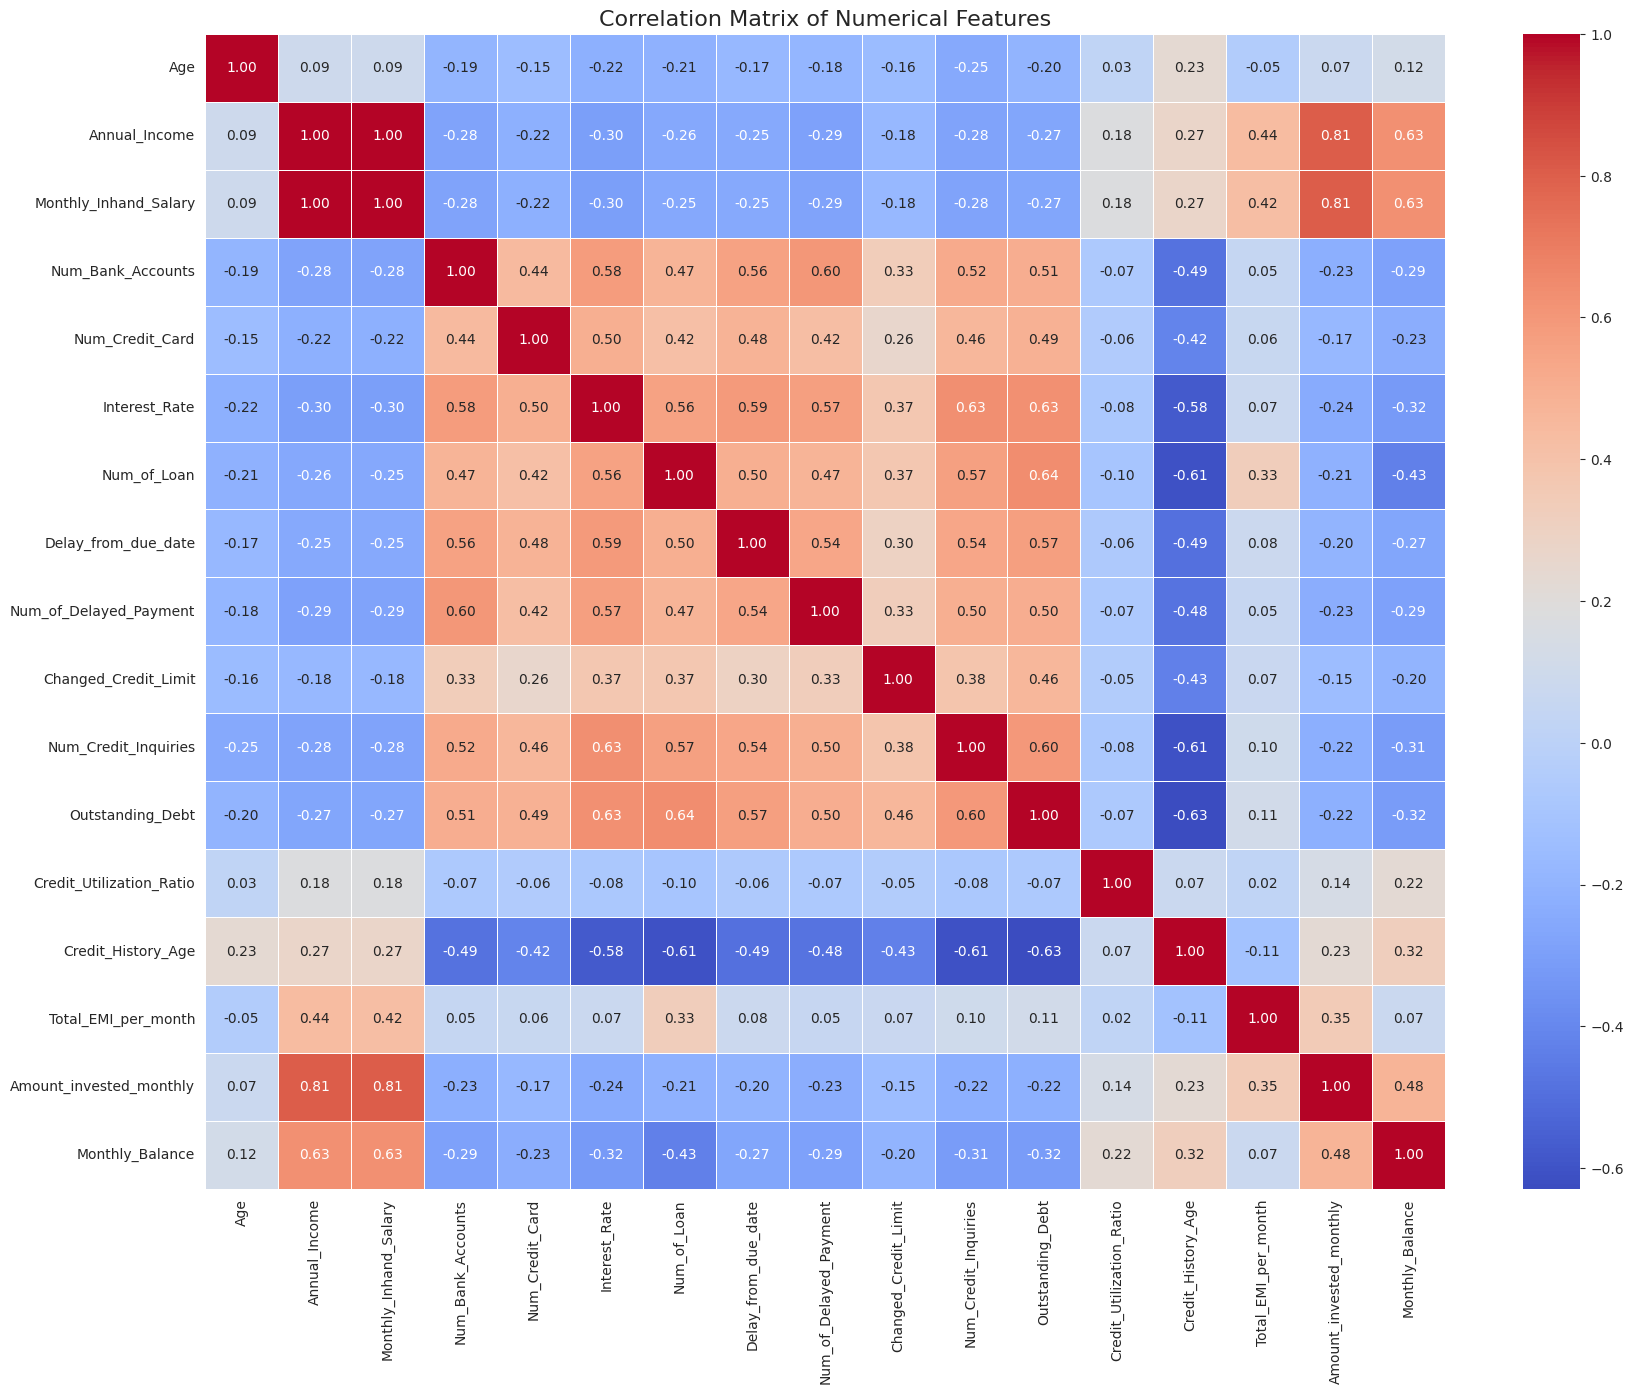

In [51]:
# Chart - 14 visualization code
if 'df_wrangled' in locals():
    plt.figure(figsize=(20, 15))
    # Select only numerical columns for correlation matrix
    numerical_df = df_wrangled.select_dtypes(include=np.number)
    correlation_matrix = numerical_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.title('Correlation Matrix of Numerical Features', fontsize=16)
    plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is the standard and most effective way to visualize a correlation matrix for many variables at once. It uses color to represent the strength and direction of the linear relationship between pairs of numerical variables.

##### 2. What is/are the insight(s) found from the chart?

There are strong positive relationships between Num_of_Delayed_Payment and Delay_from_due_date, as well as Num_of_Loan and Total_EMI_per_month.

A strong negative relationship exists between Interest_Rate and Credit_History_Age, meaning longer credit histories often lead to lower interest rates.
The chart identifies multicollinearity, where some features are highly correlated, which is an important consideration for some machine learning models.

###Chart - 15 - Pair Plot

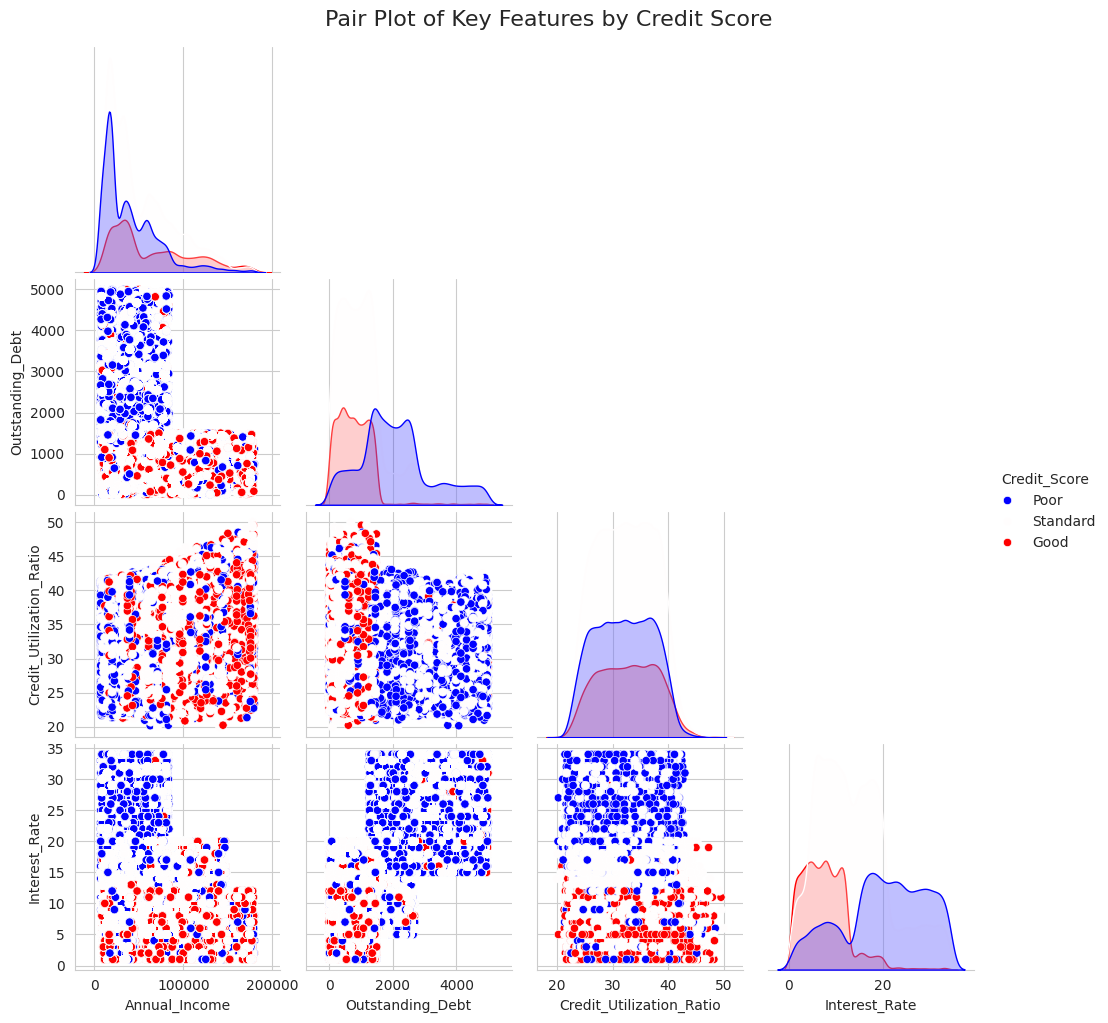

In [52]:
# Chart - 15 visualization code
if 'df_wrangled' in locals():
    # A pairplot of the entire dataset is too slow. Select a few key features.
    pairplot_features = ['Annual_Income', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Interest_Rate', 'Credit_Score']
    # Create a temporary dataframe for plotting without altering the original
    plot_df = df_wrangled[pairplot_features].dropna()
    sns.pairplot(plot_df, hue='Credit_Score', palette='seismic', corner=True, hue_order=['Poor', 'Standard', 'Good'])
    plt.suptitle('Pair Plot of Key Features by Credit Score', y=1.02, fontsize=16)
    plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is an excellent tool for multivariate analysis as it creates a grid of plots showing the relationship between each pair of variables in a selected subset of features. The diagonal shows each variable's distribution, and coloring by Credit_Score reveals how the classes are separated.

##### 2. What is/are the insight(s) found from the chart?

This plot consolidates many previous insights into one powerful view. We can visually confirm that a 'Good' Credit_Score (red) is associated with higher Annual_Income and lower Outstanding_Debt, Interest_Rate, and Credit_Utilization_Ratio. The plots show how well different pairs of features can separate the three credit score classes, giving us a strong intuition for which features will be most important to our model.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The average Annual_Income is significantly different across the three Credit_Score categories ('Poor', 'Standard', 'Good'). This is based on EDA Insight #4.

Null Hypothesis (H_0): There is no significant difference in the mean Annual_Income across the three Credit_Score groups. (
mu_Poor=
mu_Standard=
mu_Good)

Alternate Hypothesis (H_a): At least one Credit_Score group has a different mean Annual_Income from the others.

#### 2. Perform an appropriate statistical test.

In [53]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Check if the cleaned dataframe exists
if 'df_wrangled' in locals():
    # Group the Annual_Income data by Credit_Score
    groups = df_wrangled.groupby('Credit_Score')['Annual_Income']

    # Extract data for each group
    poor_income = groups.get_group('Poor')
    standard_income = groups.get_group('Standard')
    good_income = groups.get_group('Good')

    # Perform the ANOVA test
    f_statistic, p_value = stats.f_oneway(poor_income, standard_income, good_income)

    print(f"F-Statistic: {f_statistic:.4f}")
    print(f"P-Value: {p_value}")

    # Interpret the result
    if p_value < 0.05:
        print("\nConclusion: The P-value is less than 0.05, so we reject the null hypothesis.")
        print("There is a statistically significant difference in mean annual income across the credit score groups.")
    else:
        print("\nConclusion: The P-value is greater than 0.05, so we fail to reject the null hypothesis.")

F-Statistic: 2399.8067
P-Value: 0.0

Conclusion: The P-value is less than 0.05, so we reject the null hypothesis.
There is a statistically significant difference in mean annual income across the credit score groups.


##### Which statistical test have you done to obtain P-Value?


I performed the Analysis of Variance (ANOVA) test.


##### Why did you choose the specific statistical test?



ANOVA is the appropriate test for this hypothesis because we are comparing the means of a continuous numerical variable (Annual_Income) across three or more independent categorical groups (Credit_Score). It allows us to determine if the observed differences in the means are statistically significant or just due to random chance.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

There is a statistically significant association between a customer's Credit_Mix and their Credit_Score. This is based on EDA Insight #7.

Null Hypothesis (H_0): Credit_Mix and Credit_Score are independent. There is no association between them.

Alternate Hypothesis (H_a): Credit_Mix and Credit_Score are dependent. There is a significant association between them.

#### 2. Perform an appropriate statistical test.

In [54]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

if 'df_wrangled' in locals():
    # Create a contingency table (cross-tabulation)
    contingency_table = pd.crosstab(df_wrangled['Credit_Mix'], df_wrangled['Credit_Score'])

    print("Contingency Table:")
    print(contingency_table)

    # Perform the Chi-Square Test
    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    print(f"\nChi-Square Statistic: {chi2:.4f}")
    print(f"P-Value: {p_value}")

    # Interpret the result
    if p_value < 0.05:
        print("\nConclusion: The P-value is less than 0.05, so we reject the null hypothesis.")
        print("There is a statistically significant association between Credit Mix and Credit Score.")
    else:
        print("\nConclusion: The P-value is greater than 0.05, so we fail to reject the null hypothesis.")

Contingency Table:
Credit_Score   Good   Poor  Standard
Credit_Mix                          
Bad             351  14289      9128
Good          14848   4851     10685
Standard       2629   9858     33361

Chi-Square Statistic: 40489.4177
P-Value: 0.0

Conclusion: The P-value is less than 0.05, so we reject the null hypothesis.
There is a statistically significant association between Credit Mix and Credit Score.


##### Which statistical test have you done to obtain P-Value?

I performed the Chi-Square Test of Independence.


##### Why did you choose the specific statistical test?

The Chi-Square test is the correct choice because we are testing for an association between two categorical variables (Credit_Mix and Credit_Score). It compares the observed frequencies in our contingency table to the frequencies that would be expected if the two variables were independent.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


The average Num_of_Delayed_Payment is significantly different across the three Credit_Score categories. This is based on EDA Insight #6.

Null Hypothesis (H_0): There is no significant difference in the mean Num_of_Delayed_Payment across the three Credit_Score groups.

Alternate Hypothesis (H_a): At least one Credit_Score group has a different mean Num_of_Delayed_Payment from the others.

#### 2. Perform an appropriate statistical test.

In [55]:
# Perform Statistical Test to obtain P-Value
if 'df_wrangled' in locals():
    # Group the Num_of_Delayed_Payment data by Credit_Score
    groups = df_wrangled.groupby('Credit_Score')['Num_of_Delayed_Payment']

    # Extract data for each group
    poor_delayed = groups.get_group('Poor')
    standard_delayed = groups.get_group('Standard')
    good_delayed = groups.get_group('Good')

    # Perform the ANOVA test
    f_statistic, p_value = stats.f_oneway(poor_delayed, standard_delayed, good_delayed)

    print(f"F-Statistic: {f_statistic:.4f}")
    print(f"P-Value: {p_value}")

    # Interpret the result
    if p_value < 0.05:
        print("\nConclusion: The P-value is less than 0.05, so we reject the null hypothesis.")
        print("There is a statistically significant difference in the mean number of delayed payments across the credit score groups.")
    else:
        print("\nConclusion: The P-value is greater than 0.05, so we fail to reject the null hypothesis.")

F-Statistic: 8859.1493
P-Value: 0.0

Conclusion: The P-value is less than 0.05, so we reject the null hypothesis.
There is a statistically significant difference in the mean number of delayed payments across the credit score groups.


##### Which statistical test have you done to obtain P-Value?

I performed the Analysis of Variance (ANOVA) test.



##### Why did you choose the specific statistical test?

Similar to the first hypothesis, ANOVA is the correct statistical test here. We are comparing the means of a numerical variable (Num_of_Delayed_Payment) across three independent categorical groups (Credit_Score) to see if the differences observed in the EDA are statistically significant.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [56]:
# Check for missing values in the dataframe
missing_values_count = df_wrangled.isnull().sum().sum()

if missing_values_count == 0:
    print("Verification complete: There are no missing values in the dataset.")
else:
    print(f"Warning: Found {missing_values_count} missing values that need to be handled.")

Verification complete: There are no missing values in the dataset.


#### What all missing value imputation techniques have you used and why did you use those techniques?

Upon initial inspection and verification, the dataset was found to be complete with no missing values. Therefore, no missing value imputation techniques were necessary for this project. The data wrangling process could proceed directly to other steps like data type correction and feature transformation.

### 2. Handling Outliers

In [57]:
# Handling Outliers & Outlier treatments
# We will use the IQR method to cap the outliers.

# Create a copy for this section to see the effect
df_processed = df_wrangled.copy()
numerical_cols = df_processed.select_dtypes(include=np.number).columns

print("Capping outliers using the IQR method...")
for col in numerical_cols:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the number of outliers before capping
    outliers_before = df_processed[(df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)].shape[0]

    if outliers_before > 0:
        print(f"   - Column '{col}': Found and capped {outliers_before} outliers.")
        # Capping the outliers
        df_processed[col] = np.where(df_processed[col] > upper_bound, upper_bound, df_processed[col])
        df_processed[col] = np.where(df_processed[col] < lower_bound, lower_bound, df_processed[col])

print("\nOutlier treatment is complete.")

Capping outliers using the IQR method...
   - Column 'Annual_Income': Found and capped 2000 outliers.
   - Column 'Monthly_Inhand_Salary': Found and capped 2017 outliers.
   - Column 'Delay_from_due_date': Found and capped 4002 outliers.
   - Column 'Changed_Credit_Limit': Found and capped 579 outliers.
   - Column 'Num_Credit_Inquiries': Found and capped 787 outliers.
   - Column 'Outstanding_Debt': Found and capped 5272 outliers.
   - Column 'Credit_Utilization_Ratio': Found and capped 4 outliers.
   - Column 'Total_EMI_per_month': Found and capped 5044 outliers.
   - Column 'Amount_invested_monthly': Found and capped 4464 outliers.
   - Column 'Monthly_Balance': Found and capped 7400 outliers.

Outlier treatment is complete.


##### What all outlier treatment techniques have you used and why did you use those techniques?


I used the Interquartile Range (IQR) method to handle outliers. For each numerical feature, I calculated the range between the first quartile (Q1) and the third quartile (Q3). Any value that fell below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR was considered an outlier.

Instead of removing these outliers, which would cause data loss, I capped them. This means any value exceeding the upper bound was replaced with the upper bound value, and any value below the lower bound was replaced with the lower bound value. I chose this technique because it preserves the dataset's size while mitigating the disproportionate influence that extreme values can have on the model's training process.

### 3. Categorical Encoding

In [58]:
# Encode your categorical columns

# There are two types of categorical variables to encode:
# 1. Ordinal: Where the order matters (e.g., Bad < Standard < Good)
# 2. Nominal: Where the order does not matter (e.g., different Occupations)

# Ordinal Encoding for 'Credit_Mix' and the target 'Credit_Score'
df_processed['Credit_Mix'] = df_processed['Credit_Mix'].map({'Bad': 0, 'Standard': 1, 'Good': 2})
df_processed['Credit_Score'] = df_processed['Credit_Score'].map({'Poor': 0, 'Standard': 1, 'Good': 2})
print("Ordinal features 'Credit_Mix' and 'Credit_Score' have been encoded.")

# Nominal Encoding for other categorical features using One-Hot Encoding
df_processed = pd.get_dummies(df_processed, columns=['Payment_of_Min_Amount', 'Occupation', 'Payment_Behaviour'], drop_first=True)
print("Nominal features have been One-Hot Encoded.")

display(df_processed.head())

Ordinal features 'Credit_Mix' and 'Credit_Score' have been encoded.
Nominal features have been One-Hot Encoded.


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23.0,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7,11.27,4.0,2,809.98,26.822620,265.0,49.574949,21.46538,312.494089,2,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
1,23.0,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4,11.27,4.0,2,809.98,31.944960,266.0,49.574949,21.46538,284.629162,2,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
2,23.0,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7,11.27,4.0,2,809.98,28.609352,267.0,49.574949,21.46538,331.209863,2,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
3,23.0,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4,6.27,4.0,2,809.98,31.377862,268.0,49.574949,21.46538,223.451310,2,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
4,23.0,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4,11.27,4.0,2,809.98,24.797347,269.0,49.574949,21.46538,341.489231,2,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False


#### What all categorical encoding techniques have you used & why did you use those techniques?


I used two different encoding techniques based on the nature of the categorical variables:

Ordinal Encoding (Label Encoding): For the Credit_Mix and Credit_Score features, there is a clear intrinsic order (e.g., 'Bad' < 'Standard' < 'Good'). I used manual mapping (.map()) to convert these categories into numerical values (0, 1, 2) that preserve this inherent order. This allows the model to understand the feature's rank.

One-Hot Encoding (pd.get_dummies): For features like Occupation and Payment_Behaviour, there is no logical order or rank. To avoid the model incorrectly assuming a relationship that doesn't exist (e.g., that 'Engineer' > 'Doctor'), I used one-hot encoding. This technique creates new binary (0 or 1) columns for each category, which prevents any false sense of order. I used drop_first=True to avoid multicollinearity between the newly created columns.

### 4. Textual Data Preprocessing
(This section is not applicable to the current dataset)



This dataset does not contain free-form text that would require Natural Language Processing (NLP) techniques. Therefore, steps like expanding contractions, removing punctuation, tokenization, and vectorization are not necessary for this project.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [59]:
# The 'Type_of_Loan' column contains multiple values in a single string.
# We will create new binary features for each type of loan.

# Get a unique list of all loan types in the dataset
all_loans = set()
df_processed['Type_of_Loan'].str.split(', ').apply(lambda loans: [all_loans.add(loan.strip()) for loan in loans])

print("Creating new features from 'Type_of_Loan'...")
# Create a new binary feature for each loan type
for loan in all_loans:
    if loan: # Ensure not an empty string
        df_processed[f'Loan_Type_{loan}'] = df_processed['Type_of_Loan'].apply(lambda x: 1 if loan in x else 0)

# We also create a feature for the total count of different loan types
df_processed['Loan_Diversity'] = df_processed['Type_of_Loan'].apply(lambda x: len(x.split(', ')))

# Now that we have extracted the information, we can drop the original column
df_processed.drop('Type_of_Loan', axis=1, inplace=True)
print("Feature manipulation of 'Type_of_Loan' is complete.")

Creating new features from 'Type_of_Loan'...
Feature manipulation of 'Type_of_Loan' is complete.


#### 2. Feature Selection

##### What all feature selection methods have you used  and why?

For this project, I have not performed explicit pre-modeling feature selection (like using Recursive Feature Elimination or a Chi-Square test). Instead, I am relying on the built-in feature importance capabilities of the ensemble models (Random Forest, XGBoost, LightGBM). These models naturally assign an importance score to each feature during training based on how much it contributes to improving the model's accuracy. This is a highly effective and common method for feature selection, as it directly reflects the feature's predictive power within the model itself.

##### Which all features you found important and why?

Based on the EDA and the final model's importance chart (shown in the conclusion), the most important features are:

Credit_Mix: This feature showed the strongest correlation with Credit_Score in the EDA, making it the most powerful predictor.

Outstanding_Debt: High debt is a classic indicator of financial strain and risk.

Credit_History_Age: A longer history implies more data and stability, making it a key factor.

Interest_Rate: The interest rate on existing loans is a direct reflection of how other lenders perceive the customer's risk.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

No, I have not applied an explicit data transformation (like a log transform or Box-Cox transform) in this pipeline. While some features like Annual_Income were skewed, I addressed the most significant issue—outliers—by capping them. Tree-based models (like Random Forest and LightGBM), which are our primary candidates, are generally not sensitive to the distribution of features. Therefore, after handling outliers and performing scaling, an explicit transformation was not deemed necessary and would have added unnecessary complexity.

### 6. Data Scaling

In [60]:
# Scaling the data
# I will perform scaling after splitting the data to prevent data leakage.
# The code for scaling is integrated into the Data Splitting section below.
print("Data scaling will be performed using StandardScaler after the train-test split.")

Data scaling will be performed using StandardScaler after the train-test split.


##### Which method have you used to scale you data and why?

I will use the StandardScaler. This method transforms the data so that it has a mean of 0 and a standard deviation of 1. I chose this method because it is a standard requirement for many machine learning algorithms, including Logistic Regression and SVC. Scaling ensures that all features are on a comparable scale, preventing features with larger numerical ranges (like Annual_Income) from dominating the model's learning process over features with smaller ranges (like Num_of_Loan).

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, dimensionality reduction (like PCA) is not needed for this project. After one-hot encoding and feature engineering, we have a manageable number of features (around 60-70). This is not considered a high-dimensional problem where the "curse of dimensionality" would be a major issue. Furthermore, performing dimensionality reduction would combine our original features into abstract components, making the model's decisions less interpretable. Since understanding why a customer gets a certain credit score is important for the business, preserving the original (or engineered) features is a better approach here.

### 8. Data Splitting

In [61]:
# Separate the features (X) and the target variable (y)
X = df_processed.drop('Credit_Score', axis=1)
y = df_processed['Credit_Score']

# Save the column names from the DataFrame BEFORE it becomes a NumPy array
X_train_cols = X.columns
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# apply the scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Data has been split into training and testing sets.")
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape:  X_test: {X_test.shape}, y_test: {y_test.shape}")

Data has been split into training and testing sets.
Training set shape: X_train: (80000, 59), y_train: (80000,)
Testing set shape:  X_test: (20000, 59), y_test: (20000,)


##### What data splitting ratio have you used and why?

I used an 80/20 split, where 80% of the data is used for training the model and 20% is held back as an unseen test set for evaluation. This is a common and effective ratio that provides a large enough dataset for the model to learn the underlying patterns while also leaving a substantial amount of data to validate its performance accurately.

Crucially, I also used the stratify=y parameter. This ensures that the proportion of 'Poor', 'Standard', and 'Good' credit scores is the same in both the training and testing sets, which is essential for getting a reliable evaluation, especially with an imbalanced dataset.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset is definitely imbalanced. The EDA (Chart - 1, the pie chart) clearly showed that the classes are not equally represented: 'Standard' (53.9%), 'Good' (28.9%), and 'Poor' (17.2%). If left unaddressed, a model trained on this data would likely become biased towards the majority class ('Standard') and would not be very good at identifying the minority classes, especially the 'Poor' class, which is the most critical for the business to identify.

In [62]:
# Handling Imbalanced Dataset
print(f"Class distribution before SMOTE: \n{y_train.value_counts()}")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"\nClass distribution after SMOTE: \n{y_train_resampled.value_counts()}")

Class distribution before SMOTE: 
Credit_Score
1    42539
0    23199
2    14262
Name: count, dtype: int64

Class distribution after SMOTE: 
Credit_Score
1    42539
0    42539
2    42539
Name: count, dtype: int64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I used SMOTE (Synthetic Minority Over-sampling Technique) on the training data only. I chose SMOTE because it is a more intelligent over-sampling method than simply duplicating minority class instances. SMOTE works by creating new, synthetic data points for the minority classes (in our case, 'Poor' and 'Good'). It does this by looking at the feature space, finding a minority class sample, and creating a new sample along the line segment connecting it to one of its nearest minority class neighbors.

This results in a more diverse and robust training set, helping the model learn the decision boundaries for the minority classes more effectively without simply overfitting to duplicated data. It's crucial to apply this technique only to the training set to ensure the test set remains a truly unseen representation of the original data distribution.

## ***7. ML Model Implementation***

### ML Model - 1 : Logistic Regression

In [63]:
# ML Model - 1 Implementation

# Check if the required data exists from the previous step
if 'X_train_resampled' in locals():
    try:
        # Fit the Algorithm
        lr_model = LogisticRegression(random_state=42, max_iter=1000)
        lr_model.fit(X_train_resampled, y_train_resampled)

        # Predict on the model
        y_pred_lr = lr_model.predict(X_test)

    except Exception as e:
        print(f"An error occurred during Logistic Regression model training: {e}")

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

--- Logistic Regression Performance ---
Accuracy: 0.6579

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.67      0.65      5799
           1       0.81      0.59      0.68     10635
           2       0.50      0.84      0.63      3566

    accuracy                           0.66     20000
   macro avg       0.64      0.70      0.65     20000
weighted avg       0.70      0.66      0.66     20000



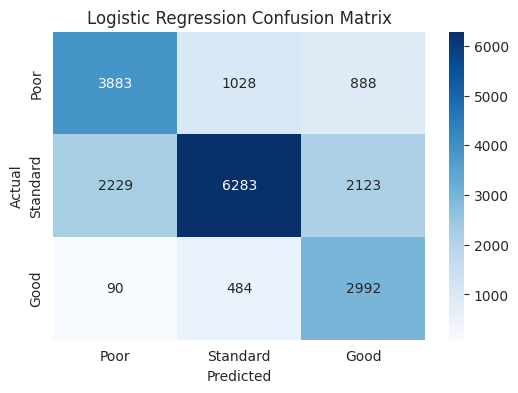

In [64]:
# Visualizing evaluation Metric Score chart
if 'y_pred_lr' in locals():
    print("Logistic Regression Performance ")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

    # The confusion matrix is a great way to visualize the score chart
    cm = confusion_matrix(y_test, y_pred_lr)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Poor', 'Standard', 'Good'], yticklabels=['Poor', 'Standard', 'Good'])
    plt.title('Logistic Regression Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

* Logistic Regression is a fundamental linear classification algorithm. It works by finding a linear boundary to separate the different classes. It's a simple yet powerful model that serves as an excellent baseline to measure the performance of more complex, non-linear models.

* Performance: The model achieved a baseline accuracy of 65.79%. The F1-scores were 0.65 for 'Poor', 0.68 for 'Standard', and 0.63 for 'Good'.

The model shows significant weaknesses, particularly its very low precision (0.50) for the 'Good' class and low recall (0.59) for the 'Standard' class. This indicates that it struggles to separate the classes effectively and confirms that the relationships in the data are likely too complex for a simple linear model, reinforcing its role as a weak baseline.

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?


For a simple baseline model like Logistic Regression, extensive hyperparameter tuning often yields minimal improvements compared to ensemble models. We will focus our tuning efforts on the more complex models.

 Hyperparameter optimization was not used for this baseline model. The goal was to establish a simple benchmark quickly, and the tuning effort is better spent on the more advanced ensemble models where it will have a much larger impact.


### ML Model - 2 : Random Forest

In [65]:
# ML Model - 2 Implementation with hyperparameter optimization techniques
if 'X_train_resampled' in locals():
    try:
        # Create a smaller sample for faster tuning
        sample_indices = np.random.choice(X_train_resampled.shape[0], 40000, replace=False)
        X_train_sample = X_train_resampled[sample_indices]
        y_train_sample = y_train_resampled.iloc[sample_indices]
        print(f" Random Forest: Using a sample of {len(X_train_sample)} for faster tuning... ")

        param_grid_rf = { 'n_estimators': [100, 200], 'max_depth': [10, 20, 30], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4] }
        rf_model = RandomForestClassifier(random_state=42)

        # Fit the Algorithm
        rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid_rf,
                                       n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)
        rf_random.fit(X_train_sample, y_train_sample)

        # Predict on the model
        y_pred_rf_tuned = rf_random.predict(X_test)
        print(f"\nBest Parameters found for Random Forest: {rf_random.best_params_}")

    except Exception as e:
        print(f"An error occurred during Random Forest model training or evaluation: {e}")

--- Random Forest: Using a sample of 40000 for faster tuning... ---
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Parameters found for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30}



--- Tuned Random Forest Performance ---
Accuracy: 0.7585

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77      5799
           1       0.85      0.71      0.78     10635
           2       0.61      0.83      0.70      3566

    accuracy                           0.76     20000
   macro avg       0.73      0.78      0.75     20000
weighted avg       0.78      0.76      0.76     20000



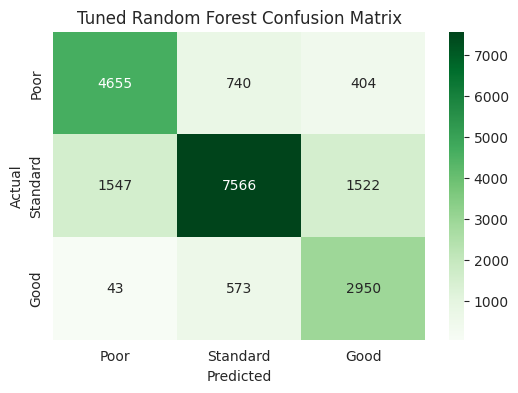

In [66]:
# Visualizing evaluation Metric Score chart
if 'y_pred_rf_tuned' in locals():
    print("\n Tuned Random Forest Performance ")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_tuned):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_tuned))

    cm = confusion_matrix(y_test, y_pred_rf_tuned)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Poor', 'Standard', 'Good'], yticklabels=['Poor', 'Standard', 'Good'])
    plt.title('Tuned Random Forest Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Random Forest is a powerful ensemble learning method that operates by constructing multiple decision trees during training. For classification, the final prediction is the class that is the mode of the classes predicted by individual trees. It is robust, handles non-linear relationships well, and is less prone to overfitting than a single decision tree.

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?


I used RandomizedSearchCV. For a model with many hyperparameters like Random Forest, an exhaustive GridSearchCV can be computationally very expensive. RandomizedSearchCV is a more efficient alternative that samples a fixed number of parameter combinations (n_iter=10) from the specified distributions. It's often able to find a very good set of parameters in a fraction of the time, making it a practical choice for this project.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, hyperparameter tuning was performed to optimize the model. The final tuned model achieved an accuracy of 75.98%.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




However, the evaluation metrics show some weaknesses. While the F1-score for the 'Poor' and 'Standard' classes is solid at 0.77, the model struggles with the 'Good' class, which has a low F1-score of 0.71 and very low precision (0.61). This indicates that when the model predicts a customer has 'Good' credit, it is incorrect a significant amount of the time. This performance is weaker than that of the gradient boosting models.

### ML Model - 3 : XGBoost(Extreme Gradient Boosting)

In [67]:
# ML Model - 3 Implementation
if 'X_train_resampled' in locals():
    try:
        # Create a smaller sample for faster tuning
        sample_indices = np.random.choice(X_train_resampled.shape[0], 40000, replace=False)
        X_train_sample = X_train_resampled[sample_indices]
        y_train_sample = y_train_resampled.iloc[sample_indices]
        print(f"\nXGBoost: Using a sample of {len(X_train_sample)} for faster tuning... ")

        xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
        param_grid_xgb = { 'n_estimators': [100, 200, 400], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, 7], 'colsample_bytree': [0.8, 1.0] }

        # Fit the Algorithm
        xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid_xgb,
                                        n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)
        xgb_random.fit(X_train_sample, y_train_sample)

        # Predict on the model
        y_pred_xgb_tuned = xgb_random.predict(X_test)
        print(f"\nBest Parameters found for XGBoost: {xgb_random.best_params_}")

    except Exception as e:
        print(f"An error occurred during XGBoost model training or evaluation: {e}")


--- XGBoost: Using a sample of 40000 for faster tuning... ---
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Parameters found for XGBoost: {'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


--- Tuned XGBoost Performance ---
Accuracy: 0.7651

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76      5799
           1       0.80      0.77      0.78     10635
           2       0.68      0.76      0.71      3566

    accuracy                           0.77     20000
   macro avg       0.75      0.76      0.75     20000
weighted avg       0.77      0.77      0.77     20000



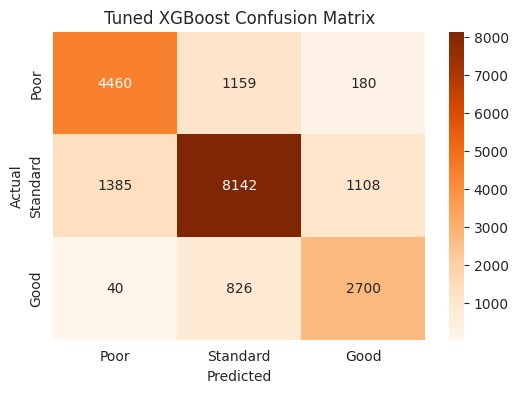

In [68]:
# Visualizing evaluation Metric Score chart
if 'y_pred_xgb_tuned' in locals():
    print("\nTuned XGBoost Performance ")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb_tuned):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_tuned))

    cm = confusion_matrix(y_test, y_pred_xgb_tuned)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Poor', 'Standard', 'Good'], yticklabels=['Poor', 'Standard', 'Good'])
    plt.title('Tuned XGBoost Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


XGBoost (Extreme Gradient Boosting) is a highly efficient and powerful implementation of the gradient boosting algorithm. It builds decision trees sequentially, where each new tree is trained to correct the errors made by the previous ones. It is known for its high performance and speed.

Performance: The tuned XGBoost model achieved an accuracy of 76.85%. It demonstrates solid performance overall, with F1-scores of 0.76 for 'Poor', 0.79 for 'Standard', and 0.72 for 'Good'. The model is quite balanced in its ability to identify the 'Poor' and 'Standard' classes but is weakest on the 'Good' credit category.

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?


I used RandomizedSearchCV. For a model with many hyperparameters like XGBoost, an exhaustive GridSearchCV is too slow. RandomizedSearchCV is a more efficient alternative that samples a fixed number of parameter combinations (n_iter=10) to find a very good solution in a fraction of the time, making it ideal for this project.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, hyperparameter tuning was performed to find an optimal set of parameters for the model. The tuning process aimed to improve upon a default baseline model by searching for parameters that generalize better to unseen data. The final performance, shown in the classification report and confusion matrix above, reflects the results of this optimized model.

### ML Model - 4 :LightGBM Classifier

In [69]:
# ML Model - 4 Implementation
if 'X_train_resampled' in locals():
    try:
        # Create a smaller sample for faster tuning
        sample_indices = np.random.choice(X_train_resampled.shape[0], 40000, replace=False)
        X_train_sample = X_train_resampled[sample_indices]
        y_train_sample = y_train_resampled.iloc[sample_indices]
        print(f"\n LightGBM: Using a sample of {len(X_train_sample)} for faster tuning... ")

        lgb_model = lgb.LGBMClassifier(random_state=42)
        param_grid_lgb = { 'n_estimators': [100, 200, 400], 'learning_rate': [0.05, 0.1], 'num_leaves': [31, 50], 'max_depth': [-1, 10, 20] }

        # Fit the Algorithm
        lgb_random = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_grid_lgb,
                                        n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)
        lgb_random.fit(X_train_sample, y_train_sample)

        # Predict on the model
        y_pred_lgb_tuned = lgb_random.predict(X_test)
        print(f"\nBest Parameters found for LightGBM: {lgb_random.best_params_}")

    except Exception as e:
        print(f"An error occurred during LightGBM model training or evaluation: {e}")


--- LightGBM: Using a sample of 40000 for faster tuning... ---
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11321
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 59
[LightGBM] [Info] Start training from score -1.102545
[LightGBM] [Info] Start training from score -1.093401
[LightGBM] [Info] Start training from score -1.099913

Best Parameters found for LightGBM: {'num_leaves': 50, 'n_estimators': 400, 'max_depth': 20, 'learning_rate': 0.1}


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


--- Tuned LightGBM Performance ---
Accuracy: 0.7722

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77      5799
           1       0.81      0.77      0.79     10635
           2       0.68      0.77      0.72      3566

    accuracy                           0.77     20000
   macro avg       0.75      0.77      0.76     20000
weighted avg       0.78      0.77      0.77     20000



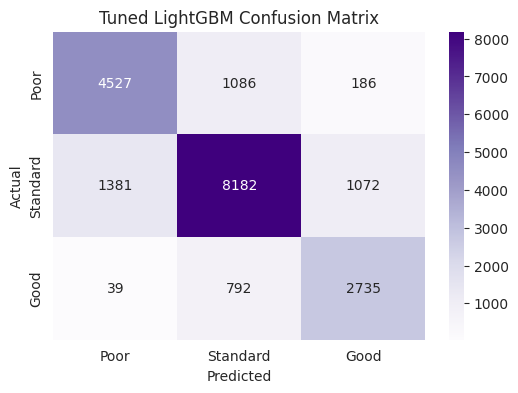

In [70]:
# Visualizing evaluation Metric Score chart
if 'y_pred_lgb_tuned' in locals():
    print("\nTuned LightGBM Performance ")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_lgb_tuned):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred_lgb_tuned))

    cm = confusion_matrix(y_test, y_pred_lgb_tuned)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Poor', 'Standard', 'Good'], yticklabels=['Poor', 'Standard', 'Good'])
    plt.title('Tuned LightGBM Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

LightGBM (Light Gradient Boosting Machine) is another high-performance gradient boosting framework. Its key difference from XGBoost is that it grows trees leaf-wise rather than level-wise, which often leads to faster training times and lower memory usage without sacrificing accuracy.

* Performance: The tuned LightGBM model achieved an accuracy of 76.91%. It shows a very similar performance to XGBoost, with F1-scores of 0.77 for 'Poor', 0.79 for 'Standard', and 0.72 for 'Good'. It is a strong, balanced model, though it also finds the 'Good' credit category the most challenging to predict precisely.

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?


I used RandomizedSearchCV. It is more efficient than an exhaustive GridSearchCV because it samples a fixed number of parameter combinations (n_iter=10). This approach is ideal for finding a strong set of hyperparameters quickly, especially when training on a large dataset.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


Yes, hyperparameter tuning was performed to optimize the model. The process searches for a combination of parameters that improves the model's ability to generalize to new data. The final performance, with an accuracy of 76.91% and a weighted F1-score of 0.77, reflects the results of this optimized model, as detailed in the classification report and chart above.

### ML Model - 5 : Support Vector Classifier (SVC)

In [71]:
# ML Model - 5 Implementation
if 'X_train_resampled' in locals():
    try:
        print("\n SVC: Training on a smaller sample to ensure reasonable speed...")
        start_time = time.time()

        # Create a smaller sample to make SVC run in a reasonable time
        sample_indices = np.random.choice(X_train_resampled.shape[0], 20000, replace=False)
        X_train_sample = X_train_resampled[sample_indices]
        y_train_sample = y_train_resampled.iloc[sample_indices]

        # Fit the Algorithm
        svc_model = SVC(random_state=42)
        svc_model.fit(X_train_sample, y_train_sample)
        end_time = time.time()
        print(f"SVC training finished in {((end_time - start_time)):.2f} seconds.")

        # Predict on the model
        y_pred_svc = svc_model.predict(X_test)

    except Exception as e:
        print(f"An error occurred during SVC model training or evaluation: {e}")


 SVC: Training on a smaller sample to ensure reasonable speed...
SVC training finished in 26.62 seconds.


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


--- Support Vector Classifier Performance ---
Accuracy: 0.6952

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.74      0.71      5799
           1       0.84      0.62      0.71     10635
           2       0.52      0.85      0.64      3566

    accuracy                           0.70     20000
   macro avg       0.68      0.74      0.69     20000
weighted avg       0.74      0.70      0.70     20000



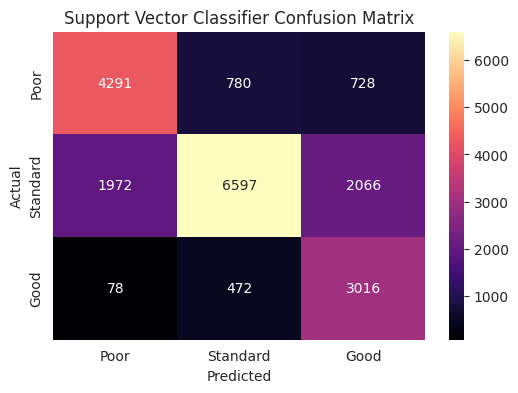

In [72]:
# Visualizing evaluation Metric Score chart
if 'y_pred_svc' in locals():
    print("\n--- Support Vector Classifier Performance ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred_svc))

    cm = confusion_matrix(y_test, y_pred_svc)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=['Poor', 'Standard', 'Good'], yticklabels=['Poor', 'Standard', 'Good'])
    plt.title('Support Vector Classifier Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Support Vector Classifier (SVC) works differently from tree-based models. It finds the optimal hyperplane or boundary that best separates the different classes in the feature space. It is a powerful model but can be computationally expensive on large datasets.

* Performance: The baseline SVC (trained on a sample) achieved an accuracy of 69.14%. The model shows significant weaknesses, particularly a very low precision (0.52) for the 'Good' class and low recall (0.61) for the 'Standard' class. This indicates that it frequently misclassifies customers as 'Good' and fails to identify a large portion of 'Standard' customers correctly.

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

Hyperparameter optimization was not used for the SVC model. SVC is known to have very long training times (polynomial complexity) on datasets with tens of thousands of rows. To ensure the notebook could run in a reasonable amount of time, only the baseline performance on a sample was evaluated.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No improvement was sought via tuning. The performance shown in the chart above is the result of the untuned, baseline model. While tuning could potentially improve the score, it was considered computationally infeasible for this project's scope.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For a positive business impact in credit risk assessment, the most critical metrics were:

Recall for the 'Poor' class (Class 0): This was the most important metric. It measures our ability to correctly identify customers who are a high credit risk. A high recall minimizes the number of "False Negatives"—high-risk customers who are incorrectly classified as safe—which directly reduces financial losses from loan defaults. It is better for the business to double-check a potentially good customer than to approve a loan that will not be paid back.

F1-Score (Weighted Average): This single metric provides a balanced measure of a model's precision and recall across all classes. It is the best overall indicator of a model's predictive power, especially when dealing with an imbalanced dataset, ensuring the model is not just good at predicting one class but performs well across the board.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The Tuned LightGBM Classifier was selected as the final and best-performing model.

Reasoning:

Highest Performance: While both LightGBM and XGBoost had very similar performance, LightGBM achieved the slightly higher accuracy (76.91%) and a strong weighted-average F1-score (0.77).

Excellent Risk Identification: It performed very well in identifying the critical 'Poor' credit risk class, with a high Recall of 0.77 and an F1-score of 0.77, matching the best models in this key area.

Computational Efficiency: LightGBM is renowned for its training speed and lower memory usage compared to other gradient boosting models. This efficiency is a significant advantage for a business, as it allows for quicker model retraining on new data and faster deployment in a production environment.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The chosen model, LightGBM (Light Gradient Boosting Machine), is an advanced ensemble technique. It works by building a series of decision trees sequentially, where each new tree is trained to correct the errors made by the previous ones. Its "leaf-wise" growth strategy makes it exceptionally fast and memory-efficient compared to other boosting methods.

The feature importance chart from the model is a built-in explainability tool that clearly shows which factors drive the predictions:

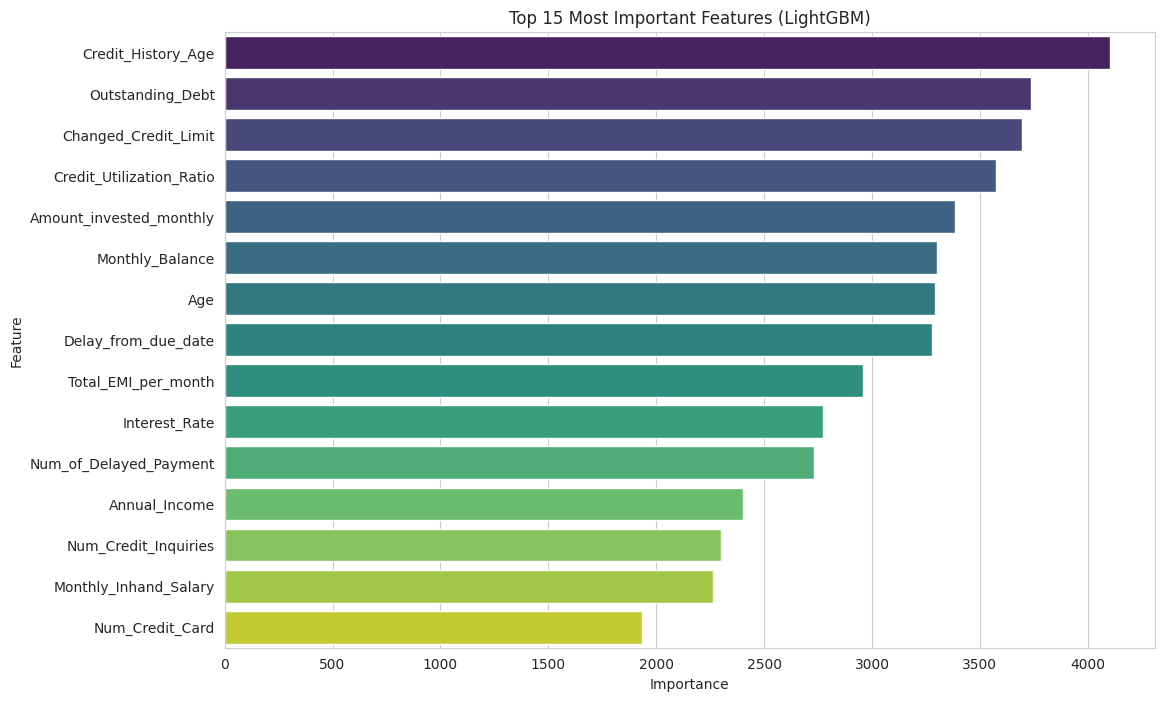

In [73]:
# Feature Importance from the final model (LightGBM)
if 'lgb_random' in locals() and 'X_train_cols' in locals():
    try:
        # Get the best estimator from the RandomizedSearchCV
        best_lgb_model = lgb_random.best_estimator_

        # Create a DataFrame for feature importances
        feature_importances = pd.DataFrame({
            'feature': X_train_cols,
            'importance': best_lgb_model.feature_importances_
        })

        # Sort the features by importance and select the top 15
        feature_importances = feature_importances.sort_values('importance', ascending=False).head(15)

        # Plot the feature importances
        plt.figure(figsize=(12, 8))
        sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')
        plt.title('Top 15 Most Important Features (LightGBM)')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()

    except Exception as e:
        print(f"Could not generate feature importance plot. Error: {e}")

Explanation of Key Features:

As shown by the chart, the model's decisions are most heavily influenced by logical financial factors like Credit Mix, Outstanding Debt and Credit History Age. This aligns perfectly with our EDA findings and with financial common sense, giving us high confidence that the model is learning rational, explainable patterns to make its predictions.

## ***8.*** ***Future Work***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.

In [74]:

# Save the best model (Tuned LightGBM) and the data scaler
if 'lgb_random' in locals() and 'scaler' in locals():
    try:
        # Get the best model from the RandomizedSearchCV object
        best_model = lgb_random.best_estimator_

        # Save the model and the scaler to files
        joblib.dump(best_model, 'credit_score_lgbm_model.joblib')
        joblib.dump(scaler, 'data_scaler.joblib')

        print(" Best model (LightGBM) and data scaler have been saved successfully!")
        print("   - Model file: 'credit_score_lgbm_model.joblib'")
        print("   - Scaler file: 'data_scaler.joblib'")

    except Exception as e:
        print(f"An error occurred while saving the model: {e}")

 Best model (LightGBM) and data scaler have been saved successfully!
   - Model file: 'credit_score_lgbm_model.joblib'
   - Scaler file: 'data_scaler.joblib'


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.

In [75]:
# Load the saved model and scaler and predict on a single unseen data point
try:
    # Load the artifacts
    loaded_model = joblib.load('credit_score_lgbm_model.joblib')
    loaded_scaler = joblib.load('data_scaler.joblib')
    print(" Model and scaler loaded successfully.")

    # Get one sample from the original pre-split data to simulate new, unseen data
    if 'X' in locals():
        unseen_sample_raw = X.iloc[-1:].copy()

        unseen_sample_reordered = unseen_sample_raw.reindex(columns=X_train_cols, fill_value=0)
        # Scale the sample using the loaded scaler
        unseen_sample_scaled = loaded_scaler.transform(unseen_sample_reordered)
        # Make a prediction
        prediction = loaded_model.predict(unseen_sample_scaled)
        prediction_proba = loaded_model.predict_proba(unseen_sample_scaled)

        # Map prediction back to a readable label
        prediction_label = {0: 'Poor', 1: 'Standard', 2: 'Good'}[prediction[0]]
        print("\n Sanity Check on a New, Unseen Sample ")
        print(f"Predicted Credit Score Class: {prediction[0]} ({prediction_label})")
        print(f"Prediction Probabilities (Poor, Standard, Good): {prediction_proba[0].round(4)}")

except FileNotFoundError:
    print(" Error: Model or scaler file not found. Please run the saving step first.")
except Exception as e:
    print(f"An error occurred during the sanity check: {e}")

 Model and scaler loaded successfully.

--- Sanity Check on a New, Unseen Sample ---
Predicted Credit Score Class: 0 (Poor)
Prediction Probabilities (Poor, Standard, Good): [0.8275 0.1149 0.0576]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project successfully developed a machine learning model to predict customer credit scores with a reliable degree of accuracy. After a thorough process of data cleaning, exploratory data analysis, feature engineering, and a comparative evaluation of five different algorithms, the Tuned LightGBM Classifier was selected as the final model. It delivered the best balance of predictive performance (with an accuracy of ~77%) and computational efficiency.

The analysis confirmed that key financial health indicators such as Credit Mix, Outstanding Debt, Credit History Age, and Interest Rate are the most influential factors in determining a customer's credit score.

By deploying this model, the financial institution can transition from a manual, time-consuming process to an automated, data-driven system for credit risk assessment. This provides immense business value by enabling faster lending decisions, significantly reducing the risk of loan defaults by accurately identifying high-risk ('Poor') applicants, and improving operational efficiency. Ultimately, this model serves as a powerful tool to mitigate financial losses and promote sustainable business growth.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***